In [1]:
import time
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from umap_ import *
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd
import plotly.express as px
import plotly
import plotly.graph_objects as go
import statistics as st
#import xlsxwriter


sns.set(style='darkgrid', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


/home/u58373/.local/lib/python3.7/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.52.0 (/home/u58373/.local/lib/python3.7/site-packages), Requirement.parse('numba<0.52,>=0.51.2')))'.
  numba.core.entrypoints.init_all()


ModuleNotFoundError: No module named 'EoN'

In [2]:
%%time
import time

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd

from seirsplus.models import *
from seirsplus.networks import *
import networkx
sns.set(style='white', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


CPU times: user 12.2 ms, sys: 108 µs, total: 12.3 ms
Wall time: 128 ms


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


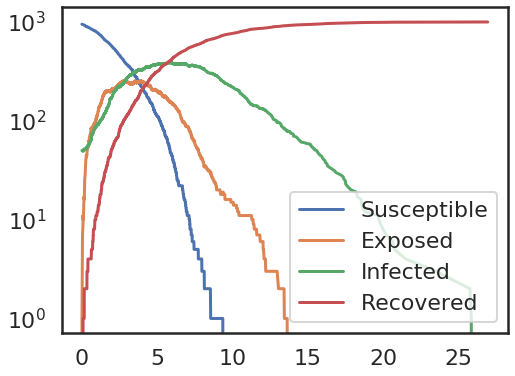

In [3]:
##Trial for characterization
s = 1000
arr = [int(s/2), int(s/2)]
c_arr = [[1,1],[1,15]]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=1.4)


r = np.random.RandomState(10)

coo_matrix1 = umap.fuzzy_simplicial_set(data,30,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)


#repeat
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz())

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)


#random.seed(0)
#node_attribute_dict = {node: 0.5+random.random() for node in G1.nodes()}
#nx.set_node_attributes(G1, values=node_attribute_dict, name='expose2infect_weight')

H1 = nx.DiGraph()
H1.add_node('S')
H1.add_edge('E', 'I', rate = 0.7)
H1.add_edge('I', 'R', rate = 0.3)

J1 = nx.DiGraph()
J1.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='weight')
IC = defaultdict(lambda: 'S')
for node in range(50):
    IC[node] = 'I'
    
return_statuses = ('S', 'E', 'I', 'R')

t, S, E, I, R = EoN.Gillespie_simple_contagion(G1, H1, J1, IC, return_statuses,
                                        tmax = float('inf'))

plt.semilogy(t, S, label = 'Susceptible')
plt.semilogy(t, E, label = 'Exposed')
plt.semilogy(t, I, label = 'Infected')
plt.semilogy(t, R, label = 'Recovered')
plt.legend()

df =pd.DataFrame(list(zip(t,S,E,I,R)), columns =['t','S','E','I','R'])




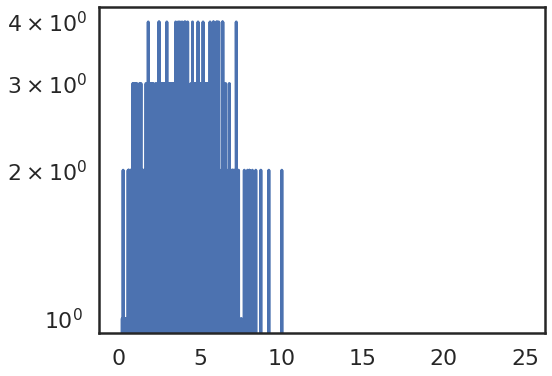

In [12]:
p= I[0]
I1= [0,0,0]
for i in range(3,len(I)):
    new = I[i]-p
    I1.append(new)
    p= I[i-3]
plt.semilogy(t, I1, label = 'Infected der')


In [36]:
def derivative(s, c_arr, sdv,n):
    ##Trial for characterization
    print([s,c_arr, sdv, n])
    #s = 1000
    arr = [int(s/2), int(s/2)]
    #c_arr = [[1,1],[1,15]]
    data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=sdv)


    r = np.random.RandomState(10)

    coo_matrix1 = umap.fuzzy_simplicial_set(data,n,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)


#repeat
    sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz())

    G1 = nx.from_scipy_sparse_matrix(sparse_matrix)


#random.seed(0)
#node_attribute_dict = {node: 0.5+random.random() for node in G1.nodes()}
#nx.set_node_attributes(G1, values=node_attribute_dict, name='expose2infect_weight')

    H1 = nx.DiGraph()
    H1.add_node('S')
    H1.add_edge('E', 'I', rate = 0.7)
    H1.add_edge('I', 'R', rate = 0.3)

    J1 = nx.DiGraph()
    J1.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='weight')
    IC = defaultdict(lambda: 'S')
    for node in range(50):
        IC[node] = 'I'
    
    return_statuses = ('S', 'E', 'I', 'R')

    t, S, E, I, R = EoN.Gillespie_simple_contagion(G1, H1, J1, IC, return_statuses,
                                        tmax = float('inf'))

    #plt.semilogy(t, S, label = 'Susceptible')
    #plt.semilogy(t, E, label = 'Exposed')
    #plt.semilogy(t, I, label = 'Infected')
    #plt.semilogy(t, R, label = 'Recovered')
    #plt.legend()

    #df =pd.DataFrame(list(zip(t,S,E,I,R)), columns =['t','S','E','I','R'])

    p= I[0]
    I1= [0,0,0]
    for i in range(3,len(I)):
        new = I[i]-p
        I1.append(new)
        p= I[i-3]
        
    return I1
    #plt.plot(t, I1, label = 'Infected der')


In [52]:
def der(I):
    p= I[0]
    I1= [0,0,0]
    for i in range(3,len(I)):
        new = I[i]-p
        I1.append(new)
        p= I[i-3]
    return I1

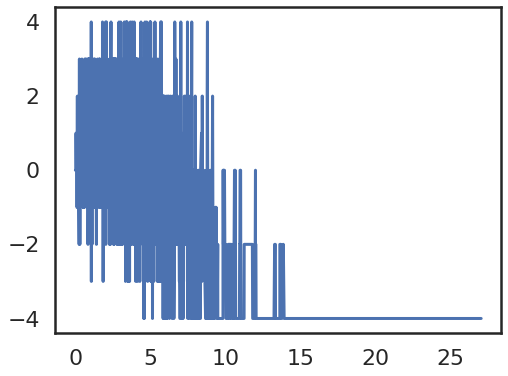

In [26]:
derivative(1000,[[1,1],[1,15]], 1, 30)

In [53]:
Id =[]
for i in range(6):
    Id.append(derivative(1000,[[1,1],[1,(4*i+5)]], 1, 30))


[1000, [[1, 1], [1, 5]], 1, 30]
[1000, [[1, 1], [1, 9]], 1, 30]
[1000, [[1, 1], [1, 13]], 1, 30]
[1000, [[1, 1], [1, 17]], 1, 30]
[1000, [[1, 1], [1, 21]], 1, 30]
[1000, [[1, 1], [1, 25]], 1, 30]


In [59]:
len(Id[3])

2901

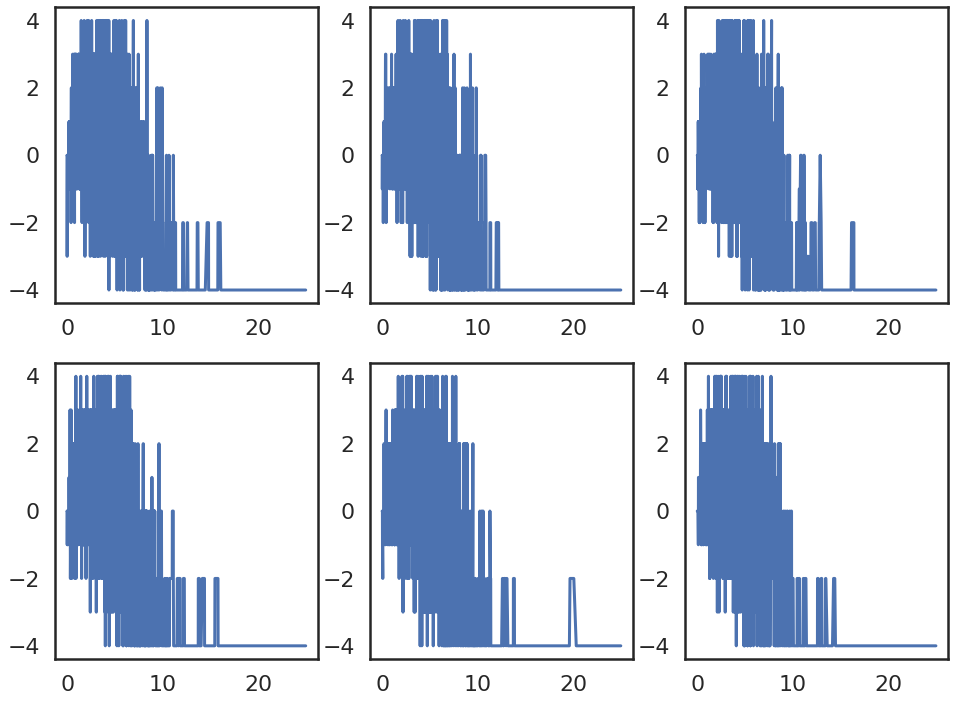

In [62]:
fig, axs = plt.subplots(2, 3,figsize=((16,12)))
for i in range(2):
    for j in range(3):
        axs[i,j].plot(t,Id[(3*i+j)])
        

In [68]:
def ipfn(s,c_arr, sd, n_neighbors ):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
    print([s,c_arr, sd, n_neighbors])
    i=n_neighbors
    arr = [int(s/2), int(s/2)]
    data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=sd)
    plt.scatter(data[:,0],data[:,1], c=y, cmap = 'viridis')
    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
    
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.4, initI = s*0.1)
    
    model_base.run(T=300)
    fig,axs =model_base.figure_basic(ylim=0.5,xlim=100)
    return fig,axs
    

[1000, [[1, 0], [1, 10]], 1.4, 10]
t = 0.04
t = 10.01
t = 20.02
t = 30.00
t = 40.06
t = 50.13
t = 60.00
t = 70.16


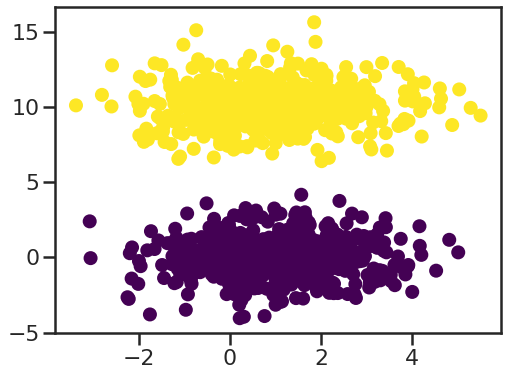

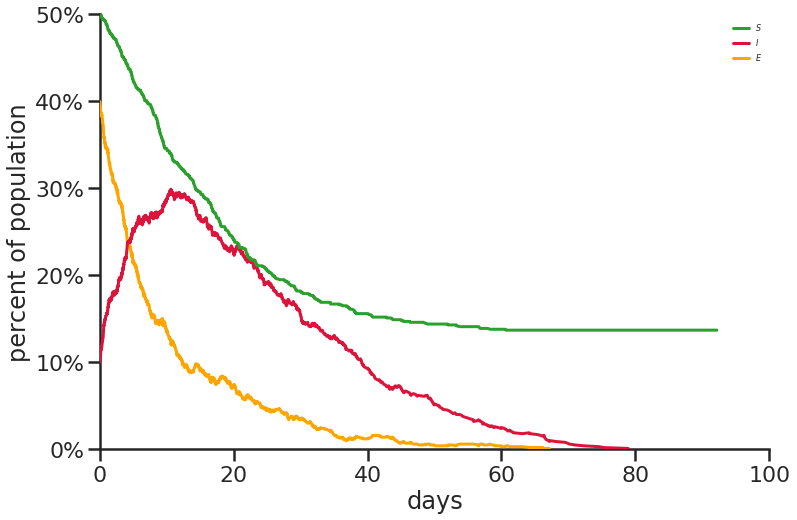

In [125]:
fig,axs = ipfn(1000, [[1,0],[1,10]], 1.4, 10)

In [130]:
line1 = axs.lines[1]
p1 = line1.get_data()

In [146]:
p[0][np.argmax(p1[1])]


9.531955485208144

[1000, [[1, 0], [1, 5]], 1.4, 10]
t = 0.00
t = 10.02
t = 20.03
t = 30.01
t = 40.07
t = 50.18
t = 60.69


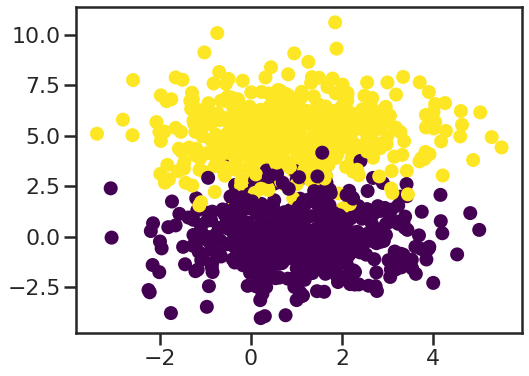

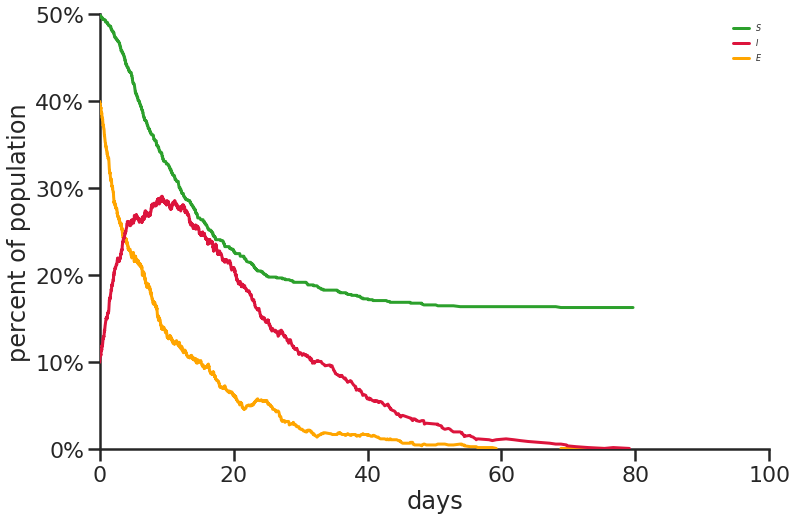

In [122]:
fig,axs = ipfn(1000, [[1,0],[1,5]], 1.4, 10)

In [123]:
line = axs.lines[1]
p = line.get_data()

In [124]:
np.argmax(p[1])



816

In [140]:
max(p1[0])

78.9353198971051

In [145]:
axs.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1b295377d0>)

In [56]:
def ipfn(s,c_arr, sd, n_neighbors,loop ):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
    print([s,c_arr, sd, n_neighbors])
    h=loop
    i=n_neighbors
    arr = [int(s/2), int(s/2)]
    data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=sd)
    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
    
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.4, initI = s*0.1)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic(ylim=0.5,xlim=100)
    
    line = axs.lines[1]
    p = line.get_data()
    m = max(p[1])
    d = p[0][np.argmax(p[1])]
    return m,d,p
    
    

[1000, [[1, 1], [1, 7]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.00
t = 30.01
t = 40.08
t = 50.46
t = 60.61
t = 70.93
t = 80.49
t = 100.59


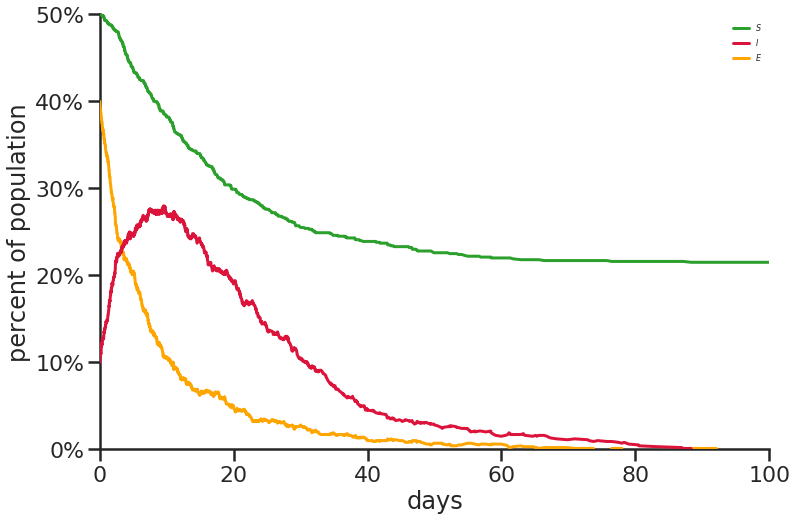

In [59]:
m,d,p=ipfn(1000,[[1,1],[1,7]], 2, 30,l)

In [67]:
max(p[0])

96.01368811750288

In [68]:
9 9 7 6 5 3 0 1 1 4 7

masked_array(data=[0.0, 0.006851325002472471, 0.011427409121690432, ...,
                   --, 96.01368811750288, --],
             mask=[False, False, False, ...,  True, False,  True],
       fill_value=1e+20)

[1000, [[1, 1], [1, 5]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.05
t = 20.10
t = 30.00
t = 40.05
t = 50.11
t = 60.72
t = 70.29
t = 90.49


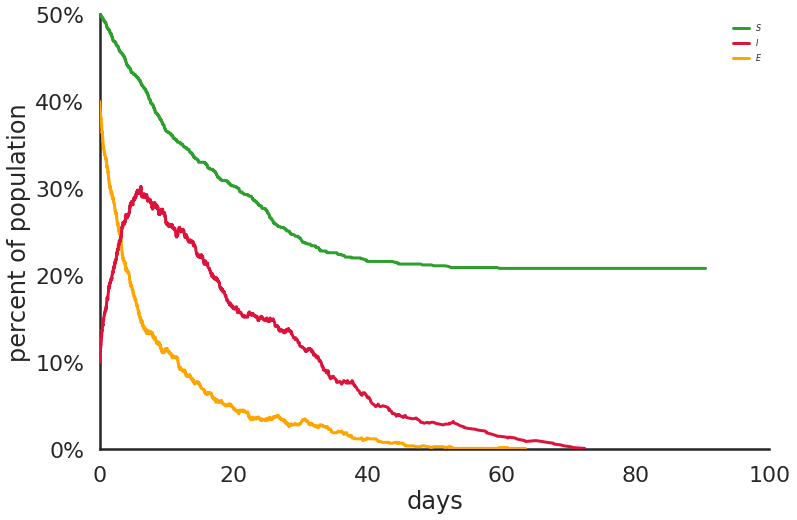

[1000, [[1, 1], [1, 5]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.03
t = 30.06
t = 40.01
t = 50.16
t = 60.63
t = 70.67


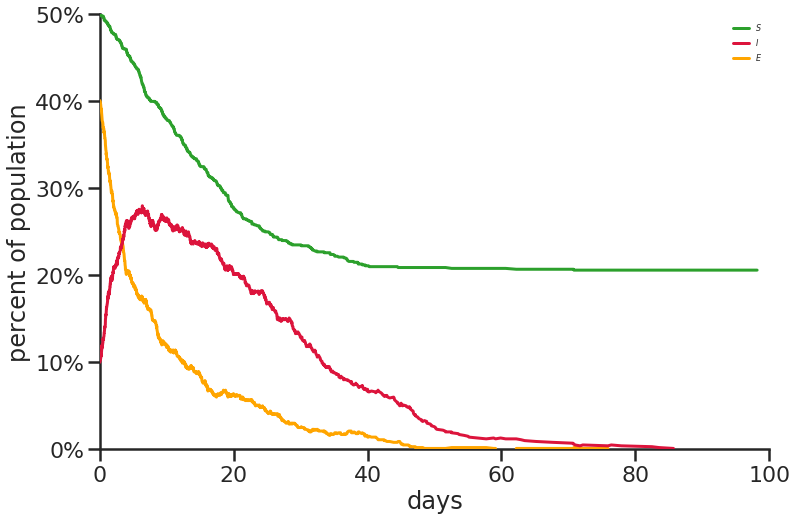

[1000, [[1, 1], [1, 5]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.00
t = 20.06
t = 30.05
t = 40.41
t = 60.53


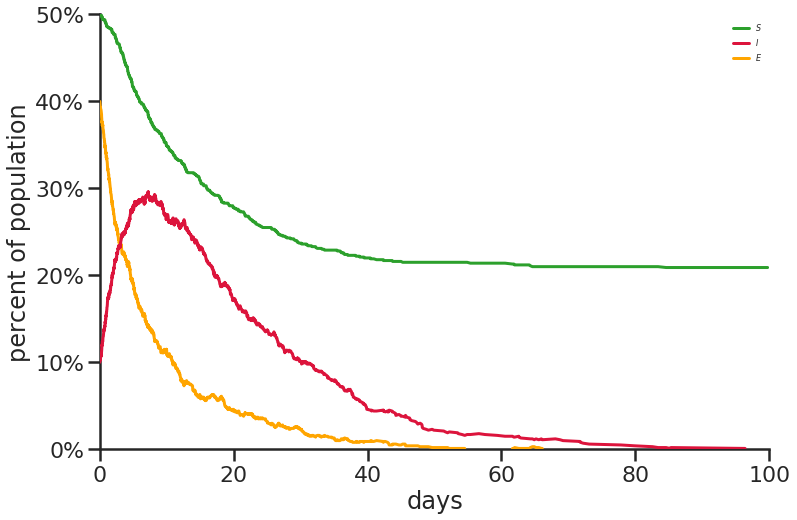

[1000, [[1, 1], [1, 5]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.01
t = 30.05
t = 40.04
t = 50.68
t = 60.08
t = 90.99


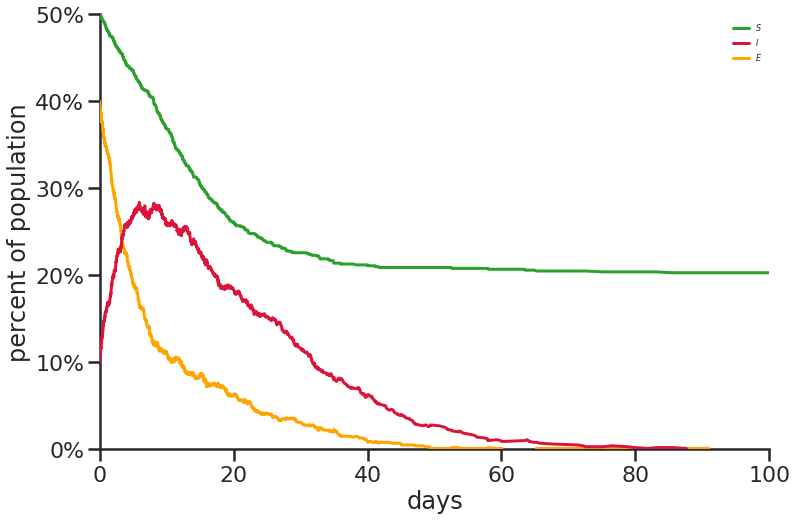

[1000, [[1, 1], [1, 5]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.00
t = 20.01
t = 30.01
t = 40.09
t = 50.08
t = 60.20
t = 90.03
t = 110.50
t = 130.15


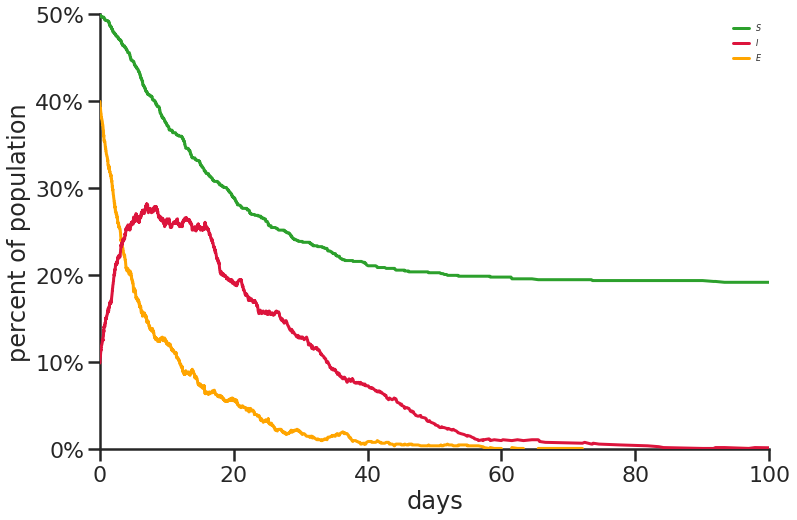

[1000, [[1, 1], [1, 5]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.00
t = 20.01
t = 30.10
t = 40.04
t = 50.08
t = 70.47
t = 80.51


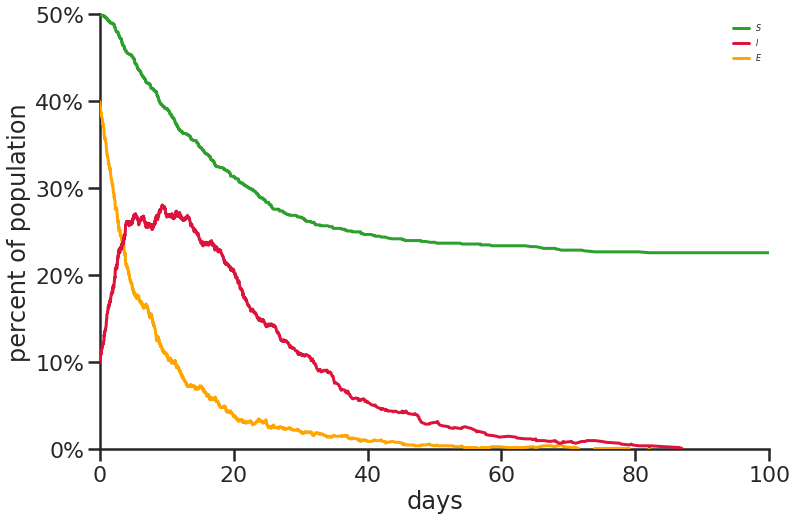

[1000, [[1, 1], [1, 9]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.00
t = 20.02
t = 30.06
t = 40.01
t = 50.03
t = 60.03
t = 70.73


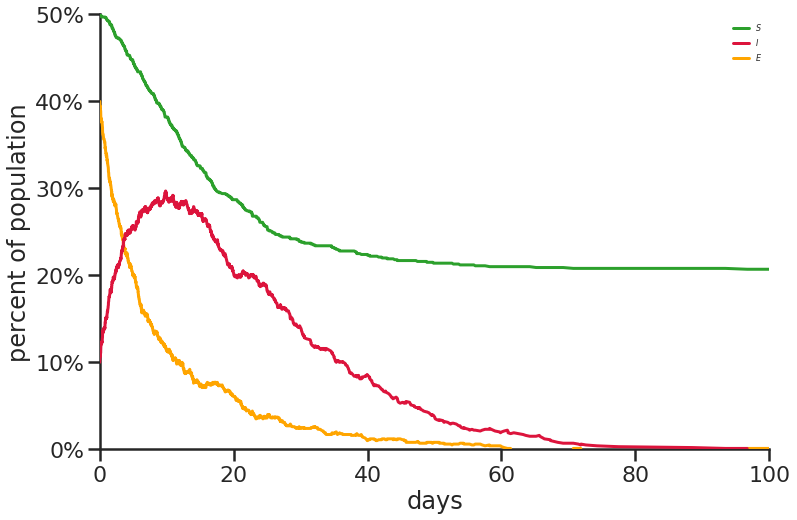

[1000, [[1, 1], [1, 9]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.00
t = 20.01
t = 30.14
t = 40.02
t = 50.34
t = 60.33
t = 70.48
t = 90.93


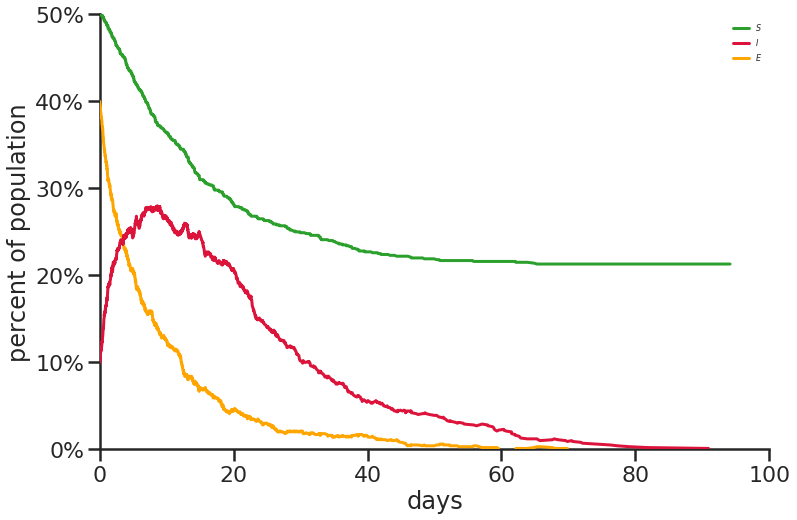

[1000, [[1, 1], [1, 9]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.03
t = 20.06
t = 30.04
t = 40.07
t = 50.19
t = 60.19
t = 70.04


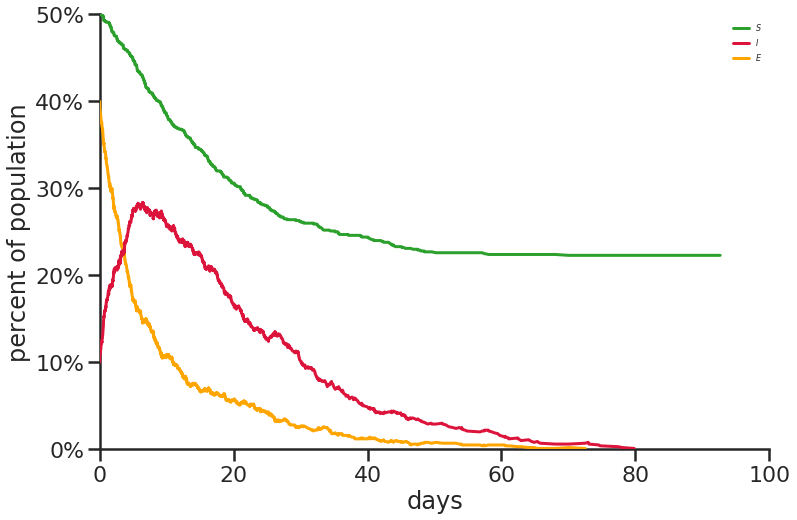

[1000, [[1, 1], [1, 9]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.02
t = 10.01
t = 20.07
t = 30.08
t = 40.83
t = 50.07
t = 60.03
t = 70.09
t = 80.51


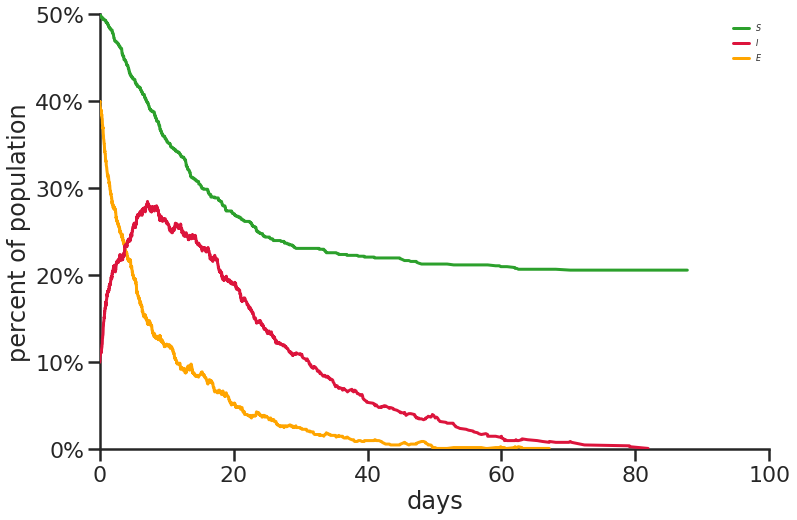

[1000, [[1, 1], [1, 9]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.00
t = 20.03
t = 30.48
t = 40.14
t = 50.53
t = 60.08
t = 80.17
t = 90.13


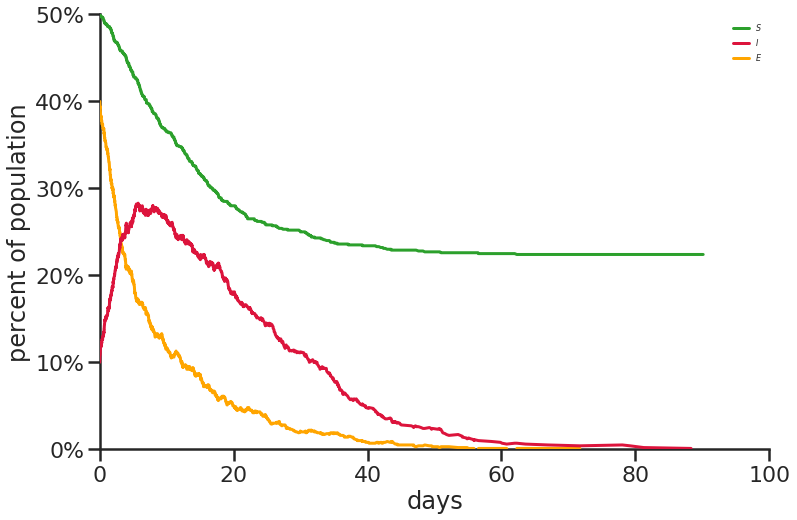

[1000, [[1, 1], [1, 9]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.00
t = 20.01
t = 30.07
t = 40.08
t = 50.39
t = 60.24
t = 70.97
t = 90.78
t = 100.87


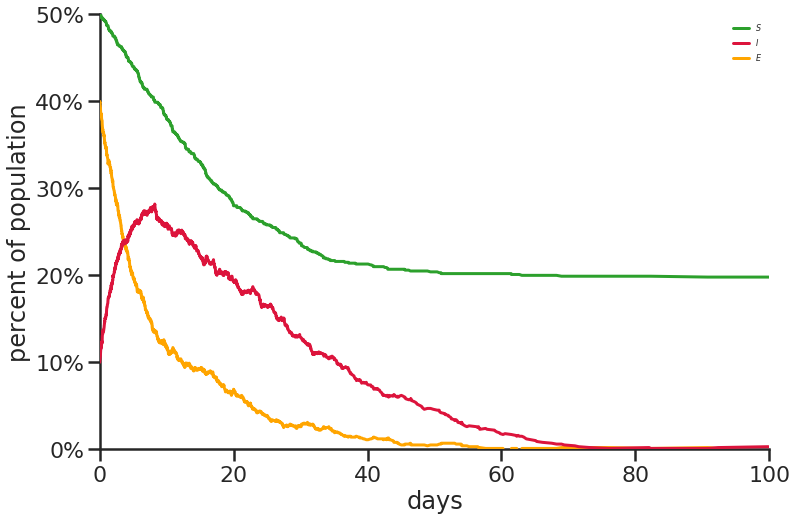

[1000, [[1, 1], [1, 13]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.02
t = 20.01
t = 30.00
t = 40.01
t = 50.11
t = 80.05


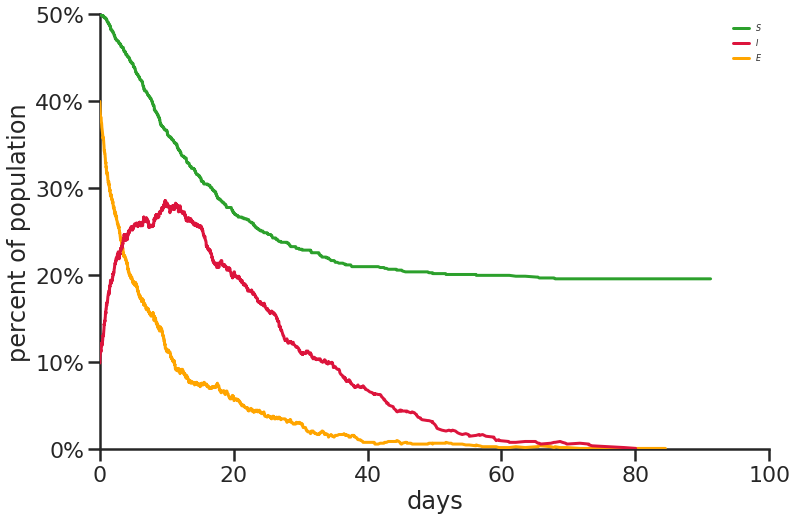

[1000, [[1, 1], [1, 13]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.03
t = 20.02
t = 30.09
t = 40.27
t = 50.01
t = 60.12


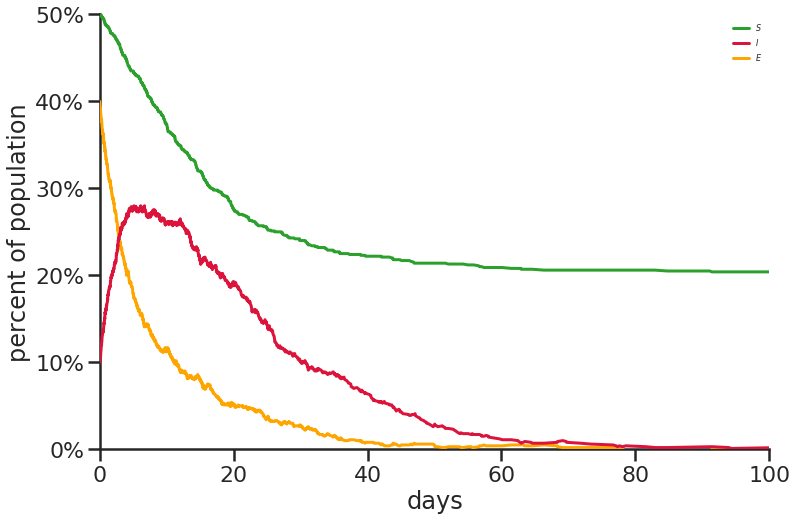

[1000, [[1, 1], [1, 13]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.02
t = 20.00
t = 30.07
t = 40.01
t = 50.23
t = 60.16
t = 70.73


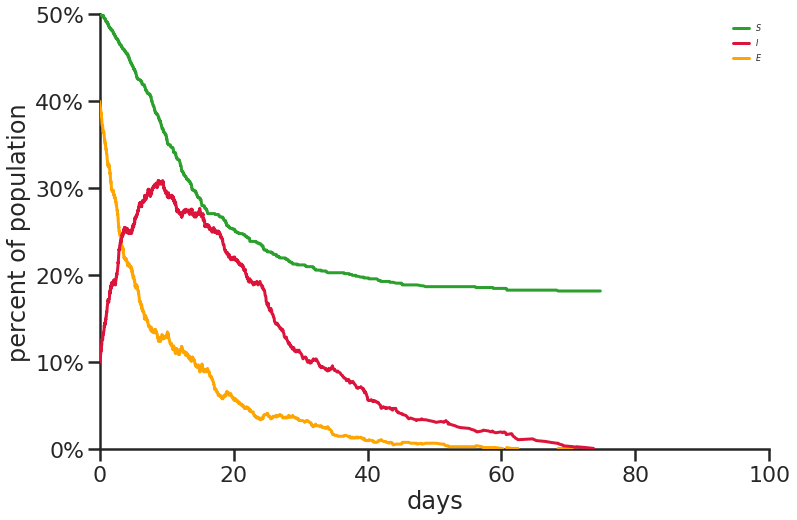

[1000, [[1, 1], [1, 13]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.01
t = 30.10
t = 40.40
t = 50.46
t = 70.30


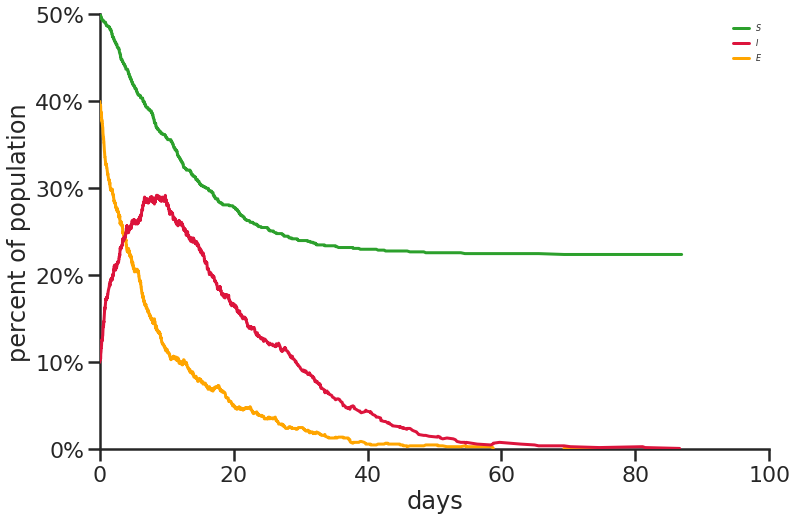

[1000, [[1, 1], [1, 13]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.03
t = 20.02
t = 30.06
t = 40.12
t = 50.16
t = 60.08
t = 70.73
t = 80.70


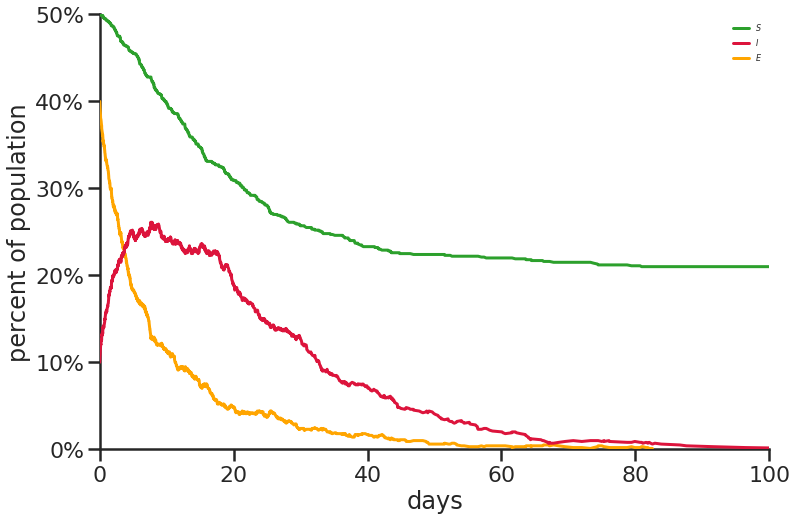

[1000, [[1, 1], [1, 13]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.03
t = 20.01
t = 30.09
t = 40.03
t = 50.07
t = 70.12
t = 80.53


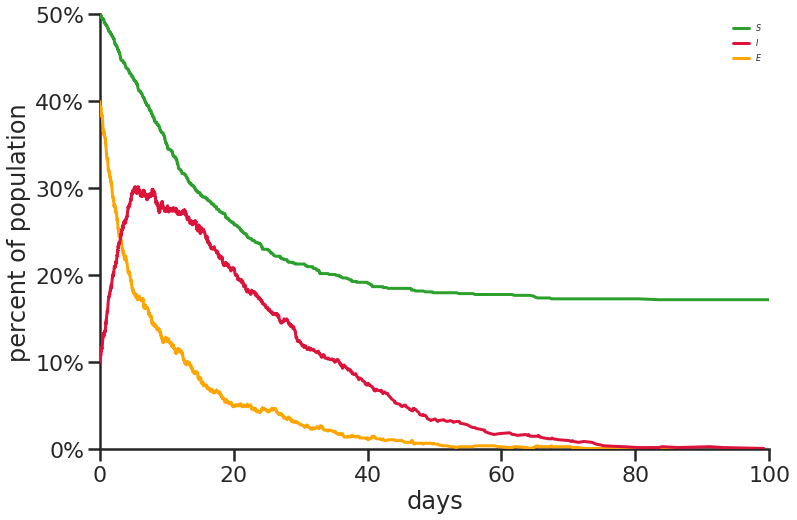

[1000, [[1, 1], [1, 17]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.05
t = 30.18
t = 40.05
t = 50.03
t = 60.48


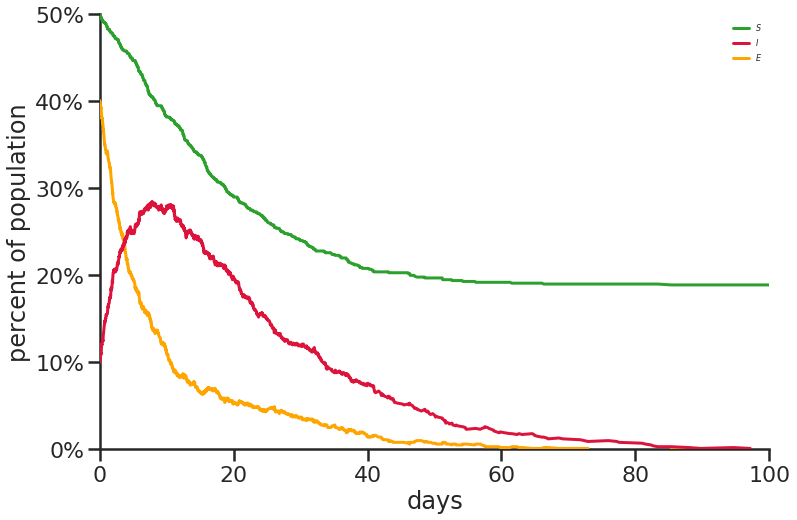

[1000, [[1, 1], [1, 17]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.02
t = 20.06
t = 30.07
t = 40.04
t = 50.37
t = 60.08
t = 70.36
t = 80.06


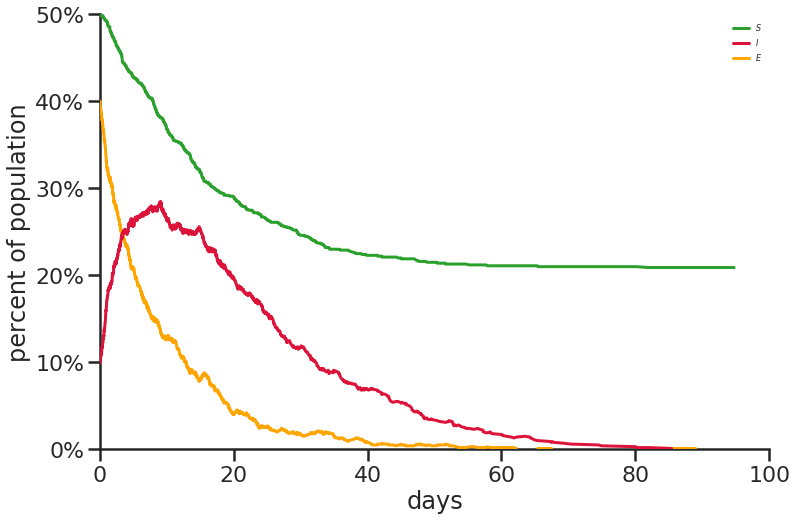

[1000, [[1, 1], [1, 17]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.00
t = 20.03
t = 30.00
t = 40.01
t = 50.01
t = 60.12
t = 70.51


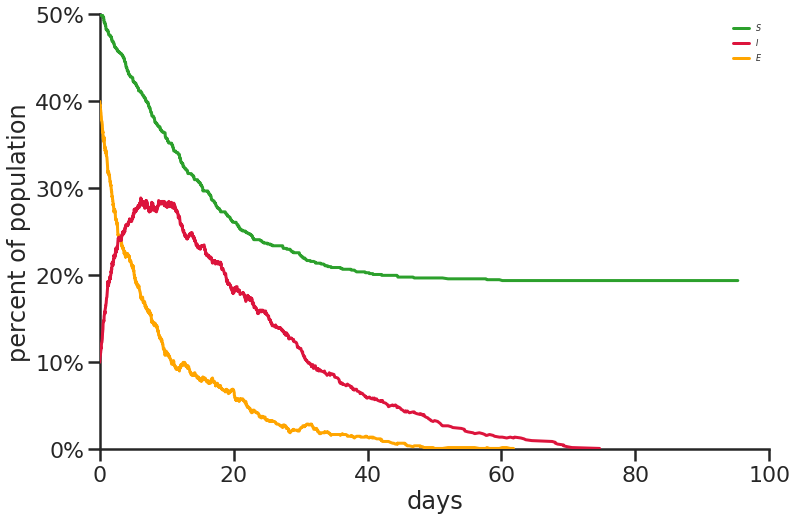

[1000, [[1, 1], [1, 17]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.07
t = 20.01
t = 30.03
t = 40.01
t = 60.08
t = 70.11


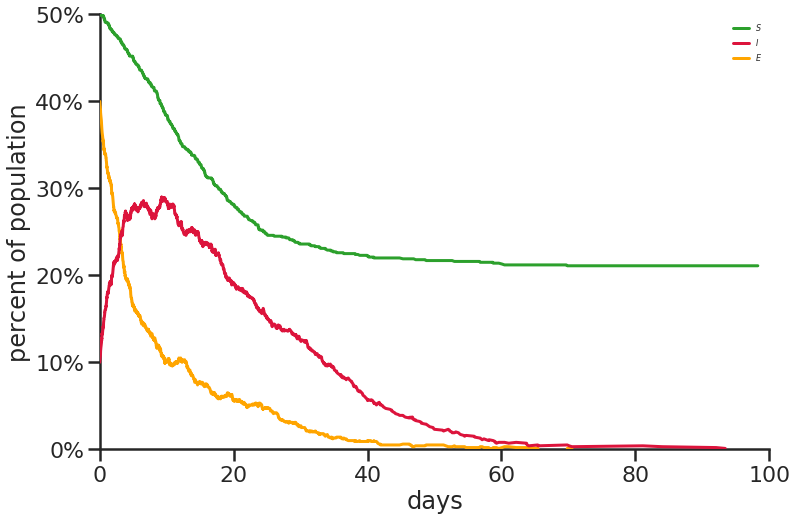

[1000, [[1, 1], [1, 17]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.01
t = 30.04
t = 40.08
t = 50.15
t = 60.49


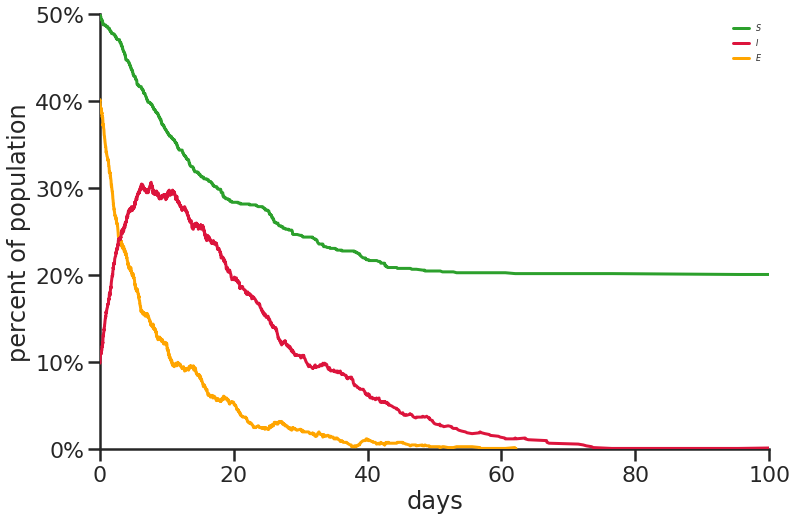

[1000, [[1, 1], [1, 17]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.02
t = 10.01
t = 20.01
t = 30.04
t = 40.25
t = 50.03
t = 60.34
t = 70.73


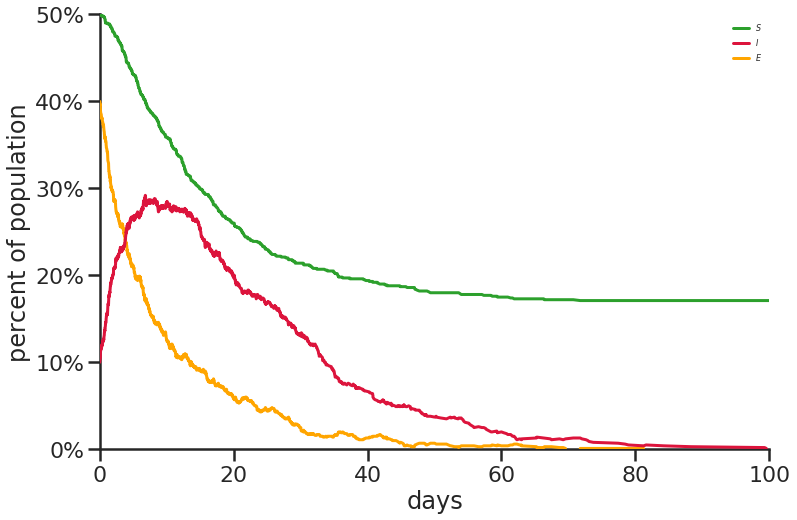

[1000, [[1, 1], [1, 21]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.02
t = 10.01
t = 20.01
t = 30.05
t = 40.28
t = 50.25
t = 60.41
t = 70.08


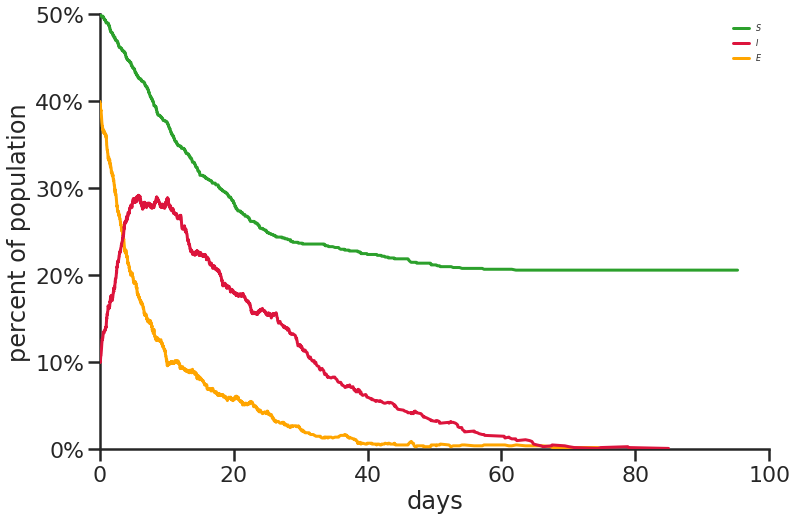

[1000, [[1, 1], [1, 21]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.02
t = 10.01
t = 20.00
t = 30.05
t = 40.34
t = 50.33
t = 60.54
t = 70.35


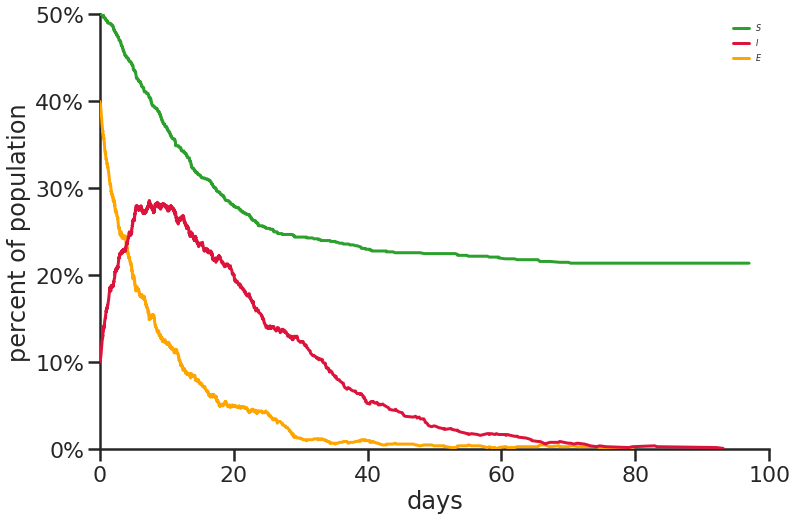

[1000, [[1, 1], [1, 21]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.00
t = 20.13
t = 30.11
t = 40.03
t = 50.17
t = 70.71


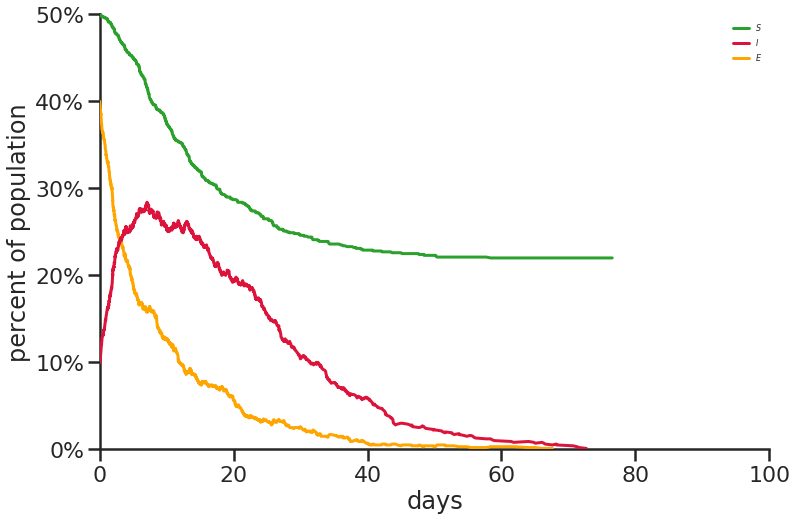

[1000, [[1, 1], [1, 21]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.03
t = 20.01
t = 30.04
t = 40.11
t = 50.30
t = 60.04
t = 80.26


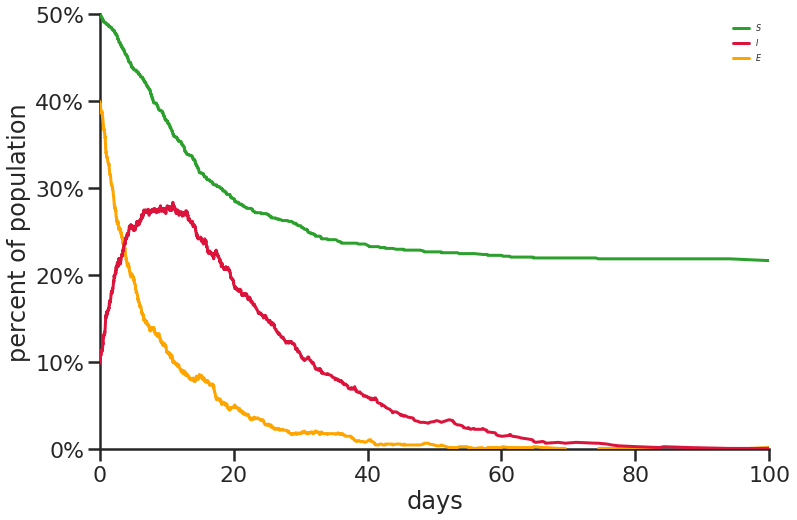

[1000, [[1, 1], [1, 21]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.03
t = 30.04
t = 40.04
t = 50.07
t = 60.45
t = 70.50
t = 80.14
t = 90.54


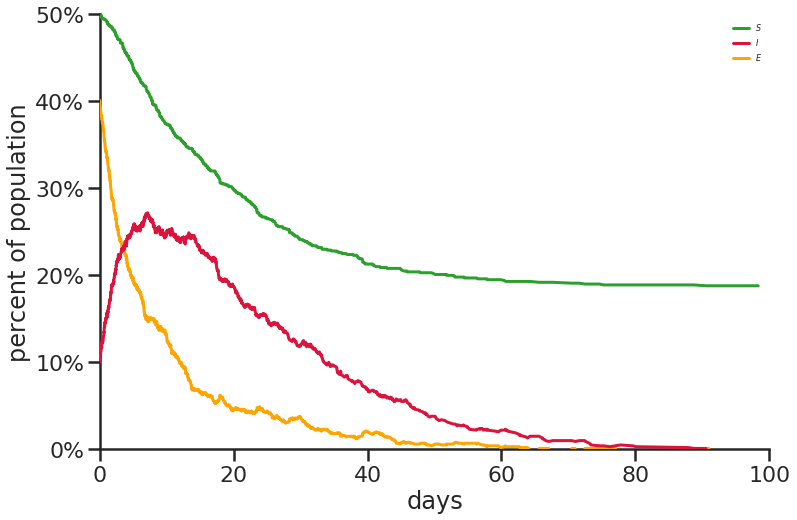

[1000, [[1, 1], [1, 21]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.04
t = 20.01
t = 30.14
t = 40.02
t = 50.16
t = 60.82
t = 70.34
t = 80.49


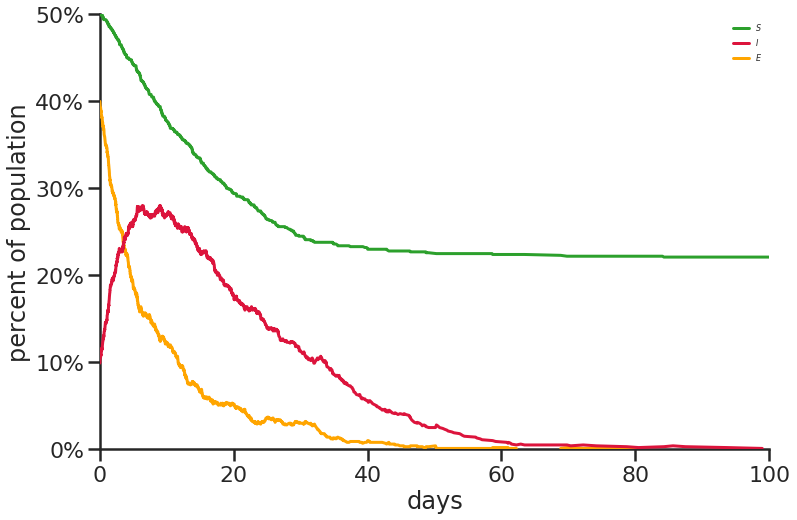

[1000, [[1, 1], [1, 25]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.00
t = 20.02
t = 30.06
t = 40.04
t = 50.30
t = 60.48


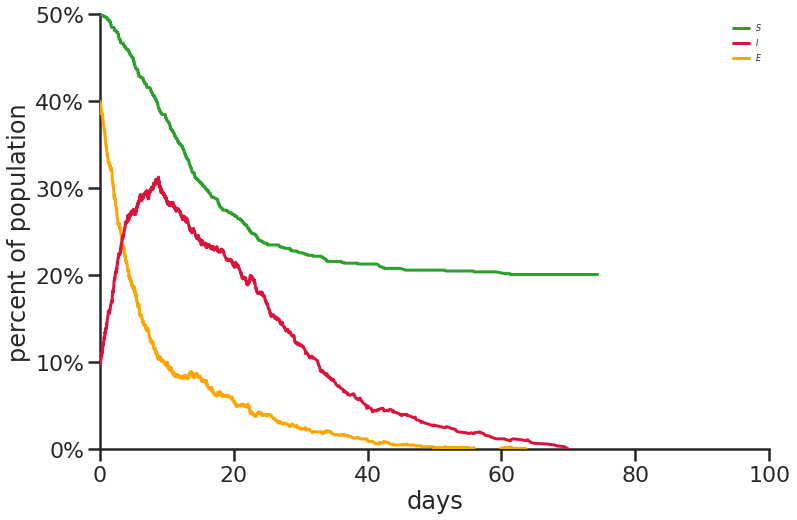

[1000, [[1, 1], [1, 25]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.03
t = 10.01
t = 20.00
t = 30.23
t = 40.19
t = 50.01
t = 60.07
t = 70.23


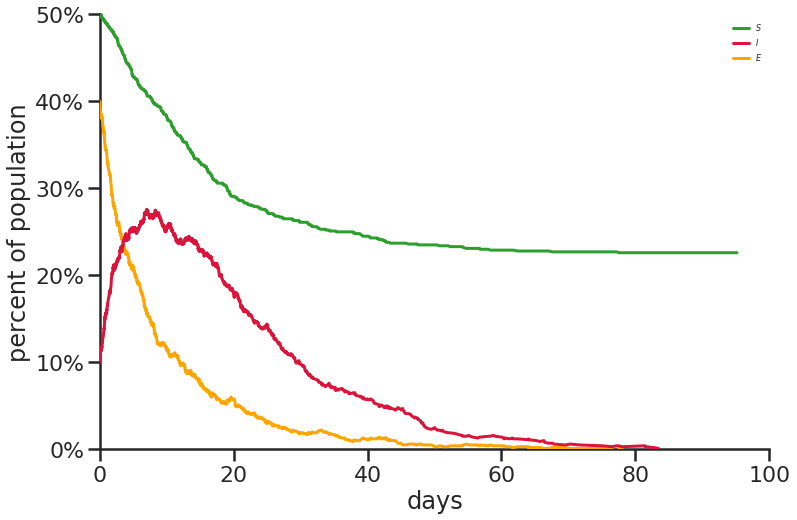

[1000, [[1, 1], [1, 25]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.05
t = 30.02
t = 40.14
t = 50.02
t = 60.61
t = 80.89


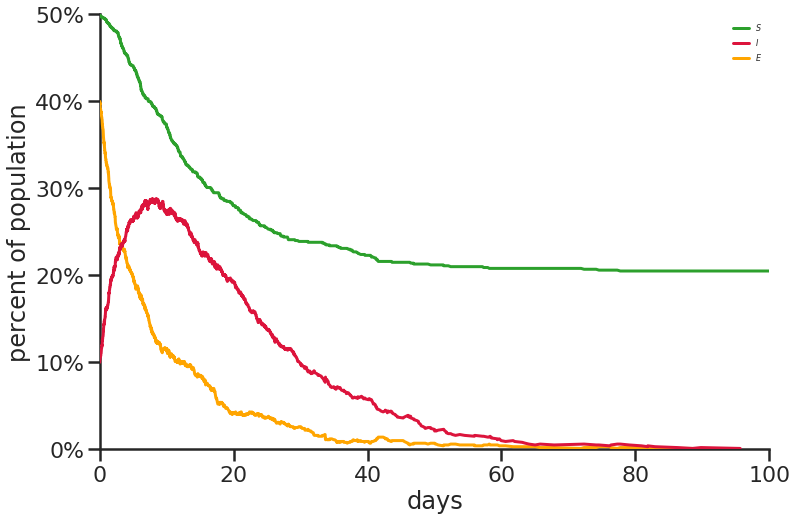

[1000, [[1, 1], [1, 25]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.02
t = 10.01
t = 20.02
t = 30.10
t = 40.16
t = 50.25
t = 60.01


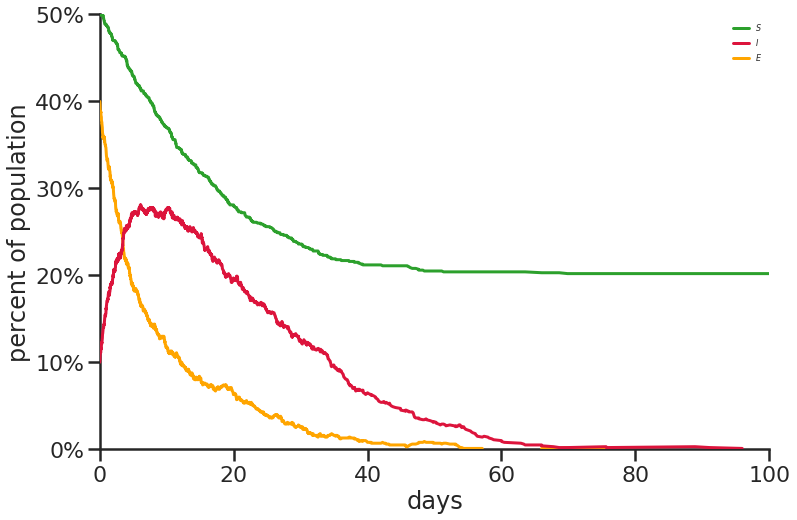

[1000, [[1, 1], [1, 25]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.02
t = 20.01
t = 30.00
t = 40.12
t = 50.04
t = 60.93
t = 70.68


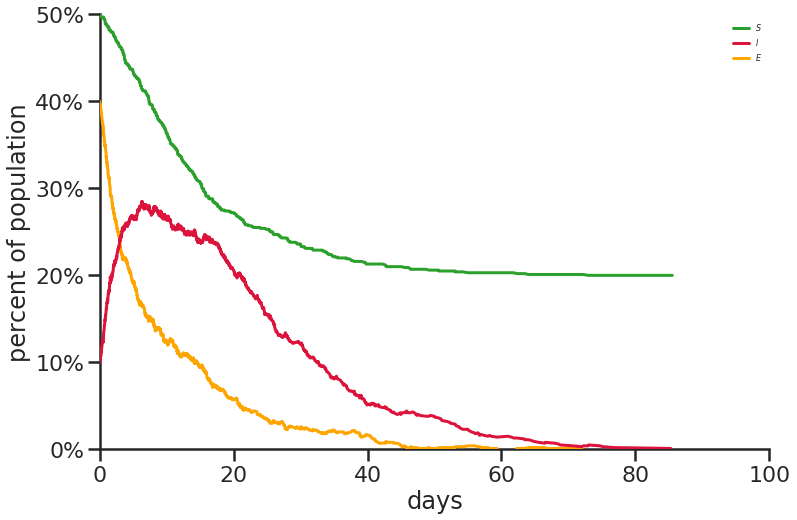

[1000, [[1, 1], [1, 25]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.05
t = 30.01
t = 40.06
t = 50.31
t = 60.94


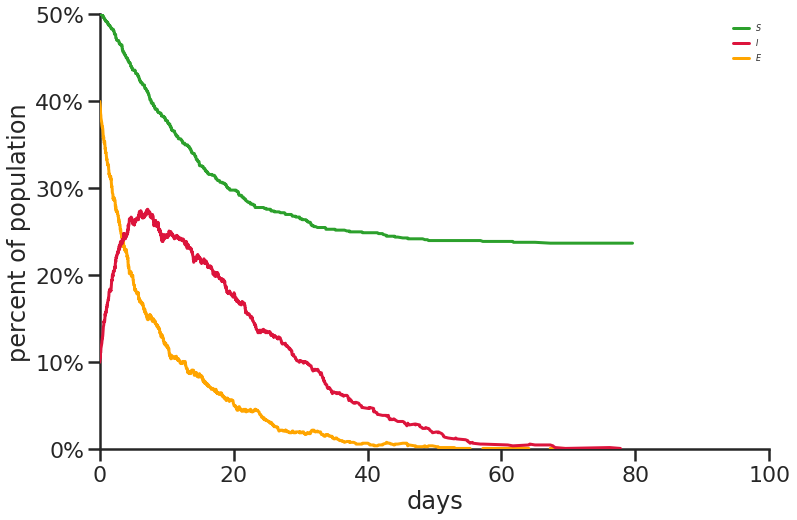

In [5]:
M =[]
D =[]
for l in range(6):
    M_el = []
    D_el = []
    for sdv in range(1, 7):
        G1 = ipfn(1000,[[1,1],[1,(4*l+5)]], sdv, 30,l)
        for loop in range(20):
            peak,days = ipfnb(G1)
        M_el.append(peak)
        D_el.append(days)
    M.append(M_el)
    D.append(D_el)

In [6]:
max_val = pd.DataFrame(M, columns=['1','2','3','4','5','6'])
max_val

1      2      3      4      5      6
0  0.302  0.280  0.296  0.284  0.282  0.281
1  0.297  0.280  0.284  0.285  0.283  0.282
2  0.286  0.280  0.309  0.292  0.261  0.302
3  0.285  0.285  0.289  0.290  0.307  0.292
4  0.292  0.286  0.284  0.284  0.272  0.280
5  0.313  0.276  0.288  0.281  0.285  0.276

In [7]:
max_val = max_val*100

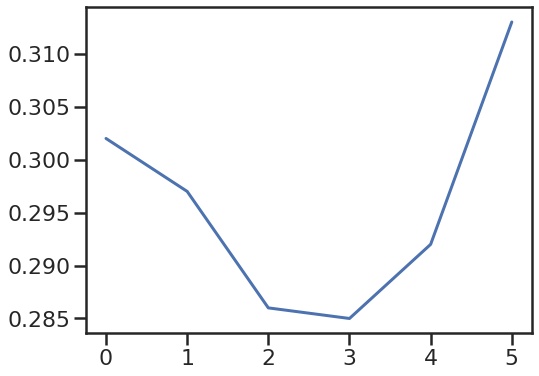

In [25]:
plt.plot(max_val['1'])

In [46]:
tr = max_val.transpose()

In [52]:
tr

0      1      2      3      4      5
1  0.289  0.312  0.266  0.281  0.281  0.268
2  0.281  0.279  0.289  0.282  0.317  0.268
3  0.290  0.268  0.291  0.324  0.280  0.297
4  0.277  0.287  0.295  0.288  0.276  0.282
5  0.276  0.298  0.289  0.279  0.282  0.278
6  0.299  0.309  0.284  0.271  0.292  0.291

In [44]:
def savefigure(i):    
    fig, axm = plt.subplots(6,1, figsize= (10,12), sharex =True,sharey =True)
    axm[0].plot(max_val['1'])
    axm[1].plot(max_val['2'])
    axm[2].plot(max_val['3'])
    axm[3].plot(max_val['4'])
    axm[4].plot(max_val['5'])
    axm[5].plot(max_val['6'])
    plt.savefig(f'constsdv|{i}.png')

In [53]:
def savefigure_t(i):  
    fig, axm = plt.subplots(6,1, figsize= (10,12), sharex =True,sharey =True)
    axm[0].plot(max_val['0'])
    axm[1].plot(max_val['1'])
    axm[2].plot(max_val['2'])
    axm[3].plot(max_val['3'])
    axm[4].plot(max_val['4'])
    axm[5].plot(max_val['5'])
    plt.savefig(f'constcentre|{i}.png')

[1000, [[1, 1], [1, 5]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.01
t = 30.05
t = 40.09
t = 50.40
t = 60.13
t = 100.66


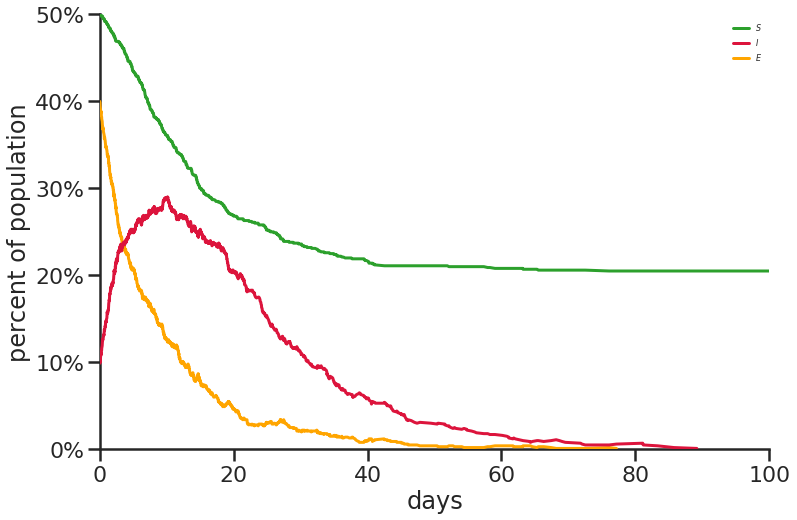

[1000, [[1, 1], [1, 5]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.03
t = 30.02
t = 40.17
t = 50.16
t = 60.67


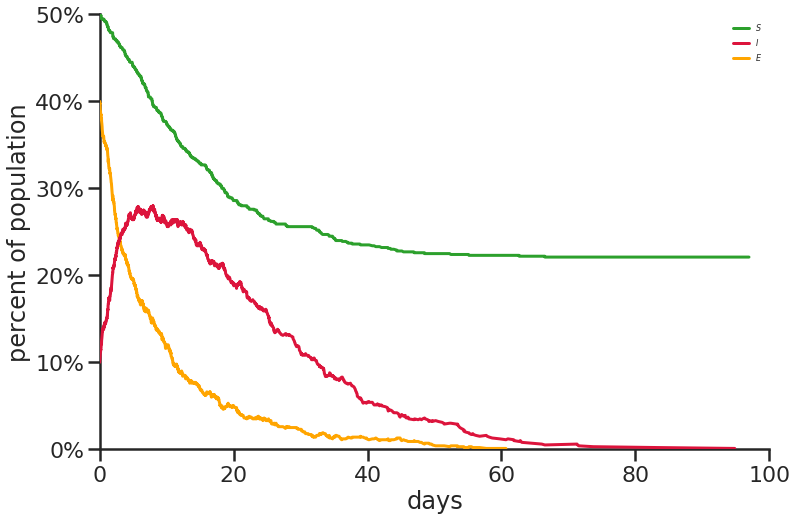

[1000, [[1, 1], [1, 5]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.02
t = 30.00
t = 40.06
t = 50.03
t = 60.18
t = 90.95


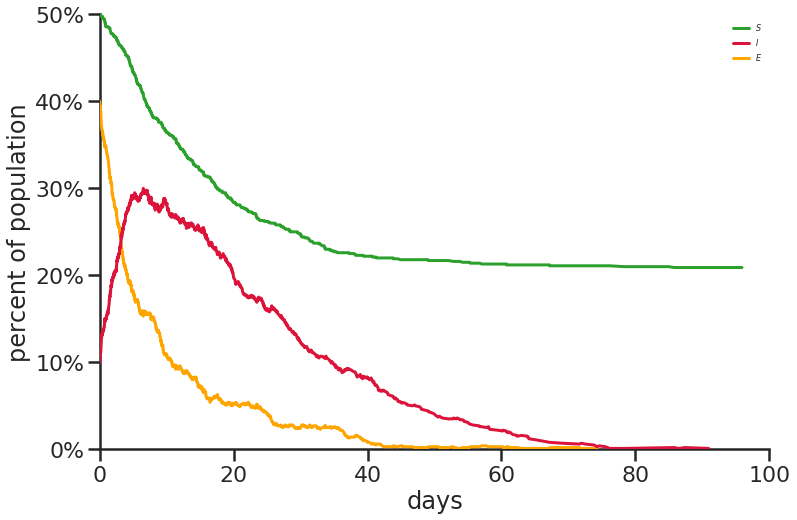

[1000, [[1, 1], [1, 5]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.02
t = 30.04
t = 40.09
t = 50.33
t = 60.32
t = 70.11
t = 80.68


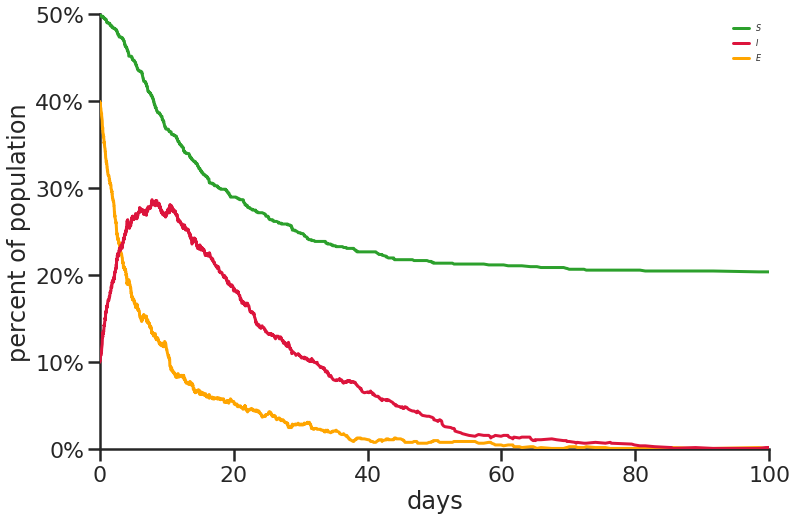

[1000, [[1, 1], [1, 5]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.07
t = 20.01
t = 30.02
t = 40.08
t = 50.06
t = 60.02


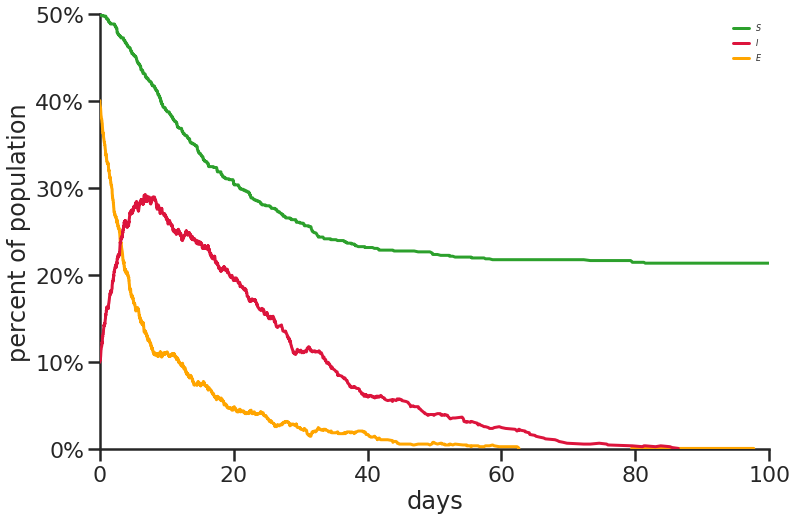

[1000, [[1, 1], [1, 5]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.02
t = 30.03
t = 40.13
t = 50.01
t = 70.63


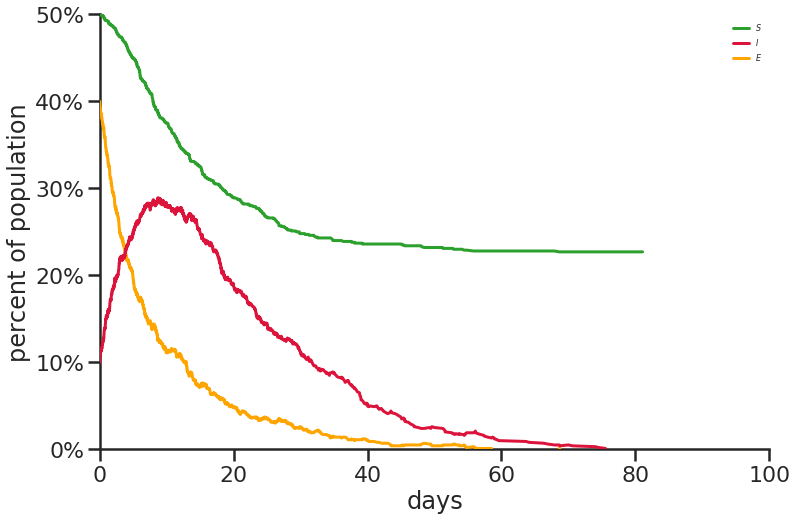

[1000, [[1, 1], [1, 9]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.05
t = 30.04
t = 40.00
t = 50.37
t = 60.02


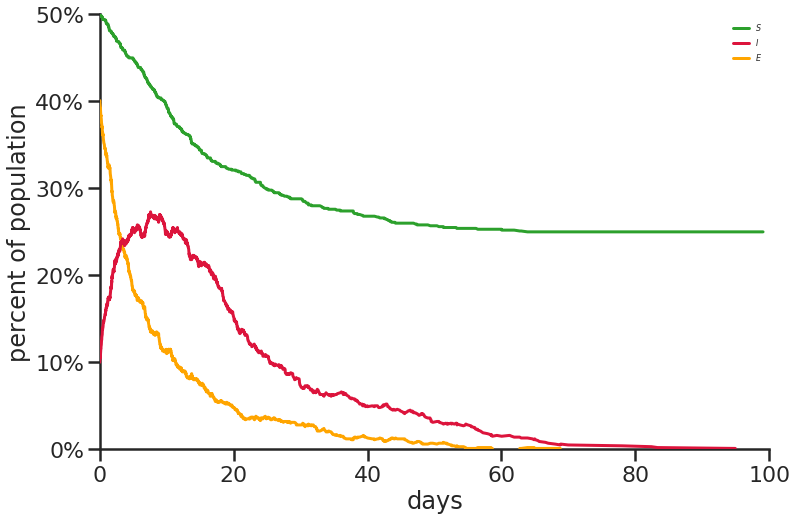

[1000, [[1, 1], [1, 9]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.00
t = 20.03
t = 30.06
t = 40.22
t = 50.55
t = 60.30


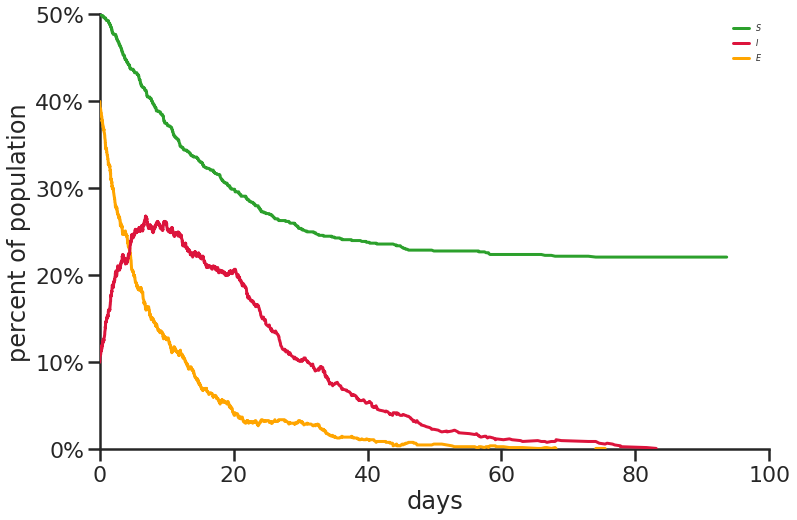

[1000, [[1, 1], [1, 9]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.03
t = 10.01
t = 20.03
t = 30.32
t = 40.35
t = 50.10
t = 60.29
t = 70.43
t = 80.45
t = 90.39
t = 100.81


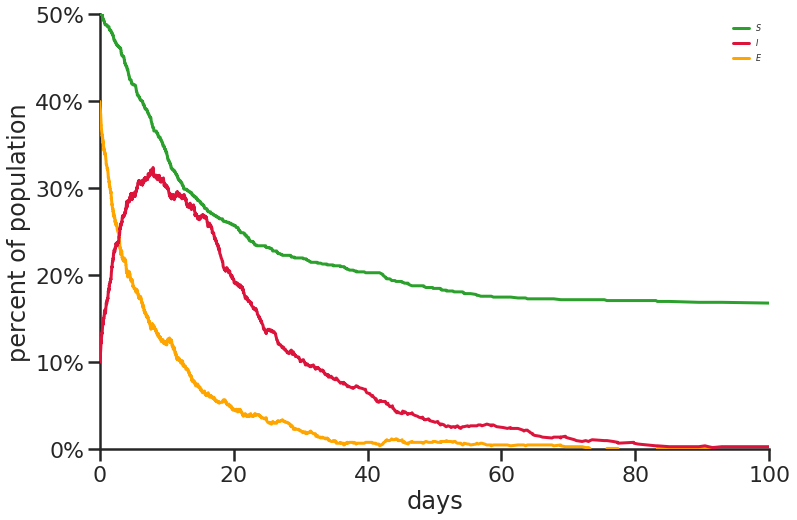

[1000, [[1, 1], [1, 9]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.02
t = 20.01
t = 30.02
t = 40.21
t = 50.02
t = 60.13
t = 70.83


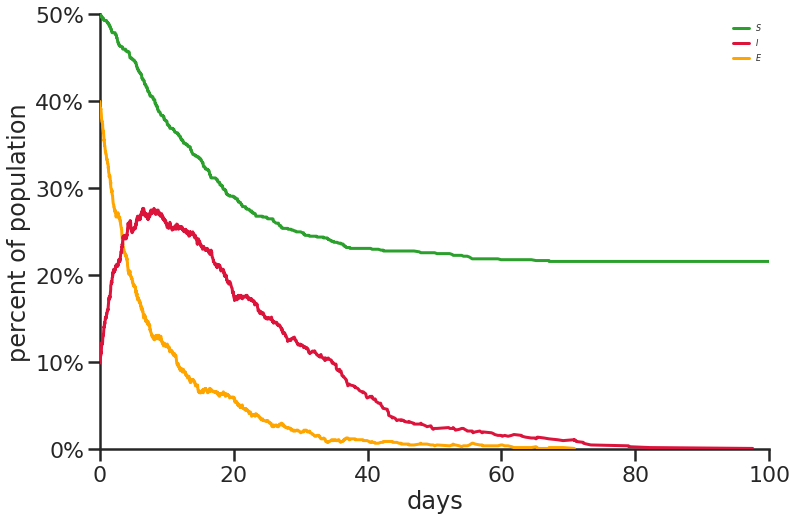

[1000, [[1, 1], [1, 9]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.08
t = 30.05
t = 40.05
t = 50.15
t = 60.07
t = 80.49
t = 90.17


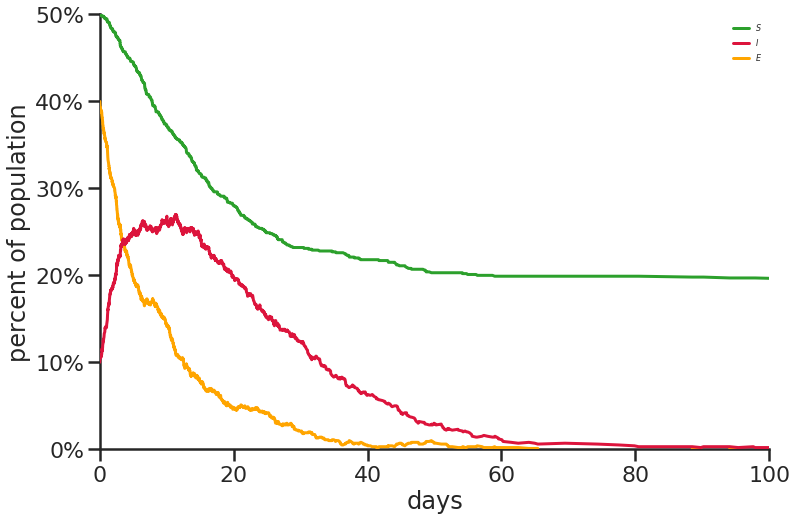

[1000, [[1, 1], [1, 9]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.00
t = 20.00
t = 30.01
t = 40.22
t = 50.13
t = 80.46


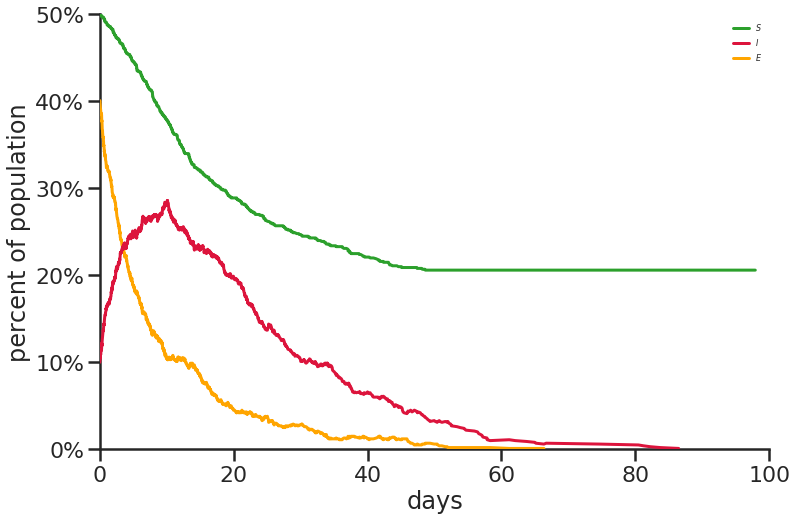

[1000, [[1, 1], [1, 13]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.00
t = 20.00
t = 30.02
t = 40.06
t = 50.35
t = 70.71
t = 90.46


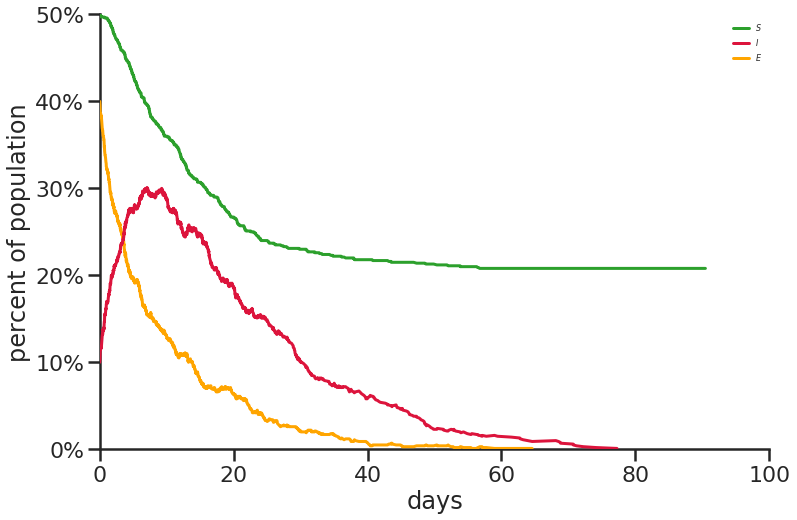

[1000, [[1, 1], [1, 13]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.04
t = 30.03
t = 40.02
t = 50.06
t = 70.72
t = 80.25
t = 90.23


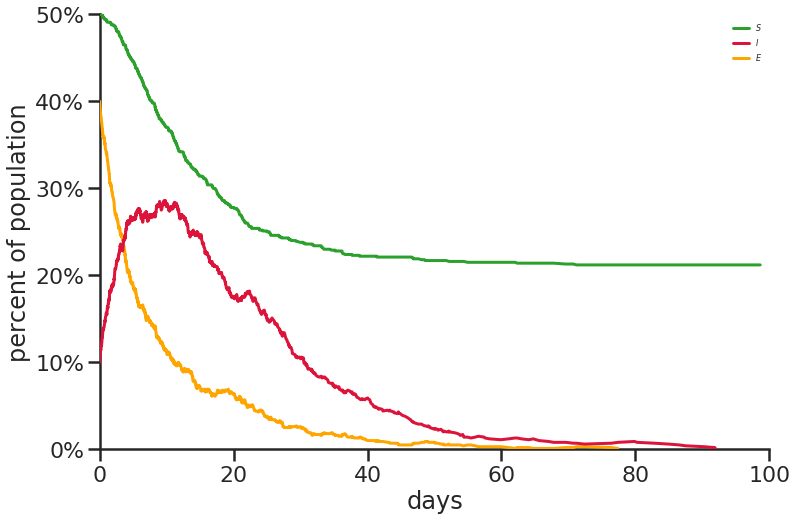

[1000, [[1, 1], [1, 13]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.04
t = 10.00
t = 20.01
t = 30.01
t = 40.09
t = 50.01
t = 60.49
t = 70.38


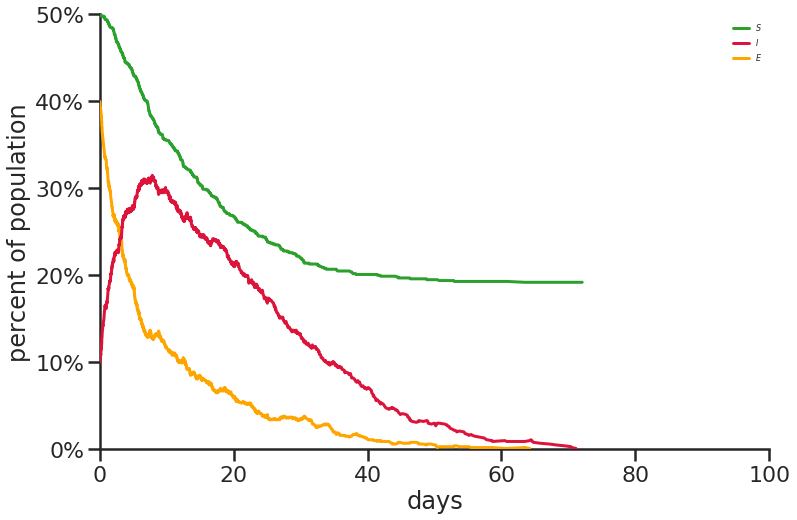

[1000, [[1, 1], [1, 13]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.02
t = 30.03
t = 40.05
t = 50.12
t = 60.79
t = 70.55


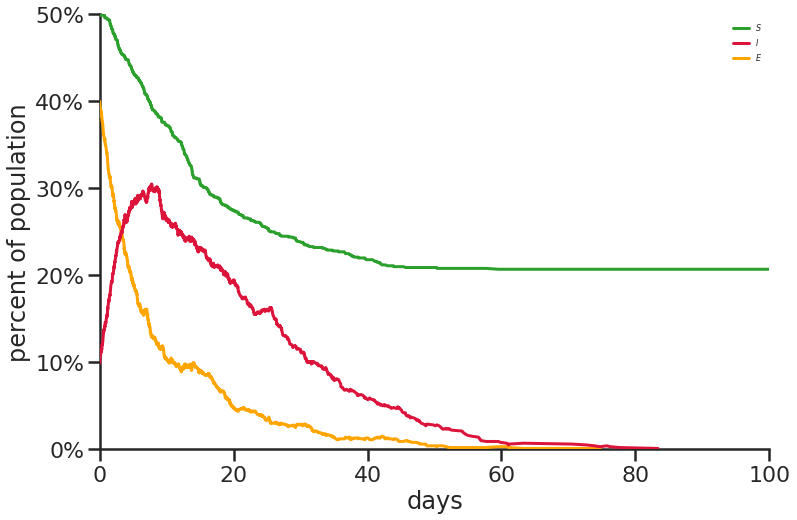

[1000, [[1, 1], [1, 13]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.03
t = 10.01
t = 20.04
t = 30.30
t = 40.11
t = 50.31
t = 60.39
t = 70.13


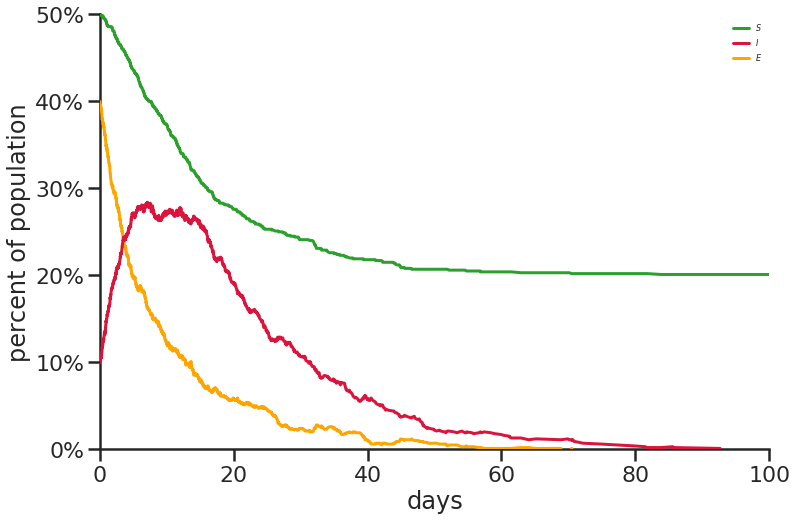

[1000, [[1, 1], [1, 13]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.00
t = 30.02
t = 40.03
t = 50.33
t = 80.84
t = 90.96
t = 130.35


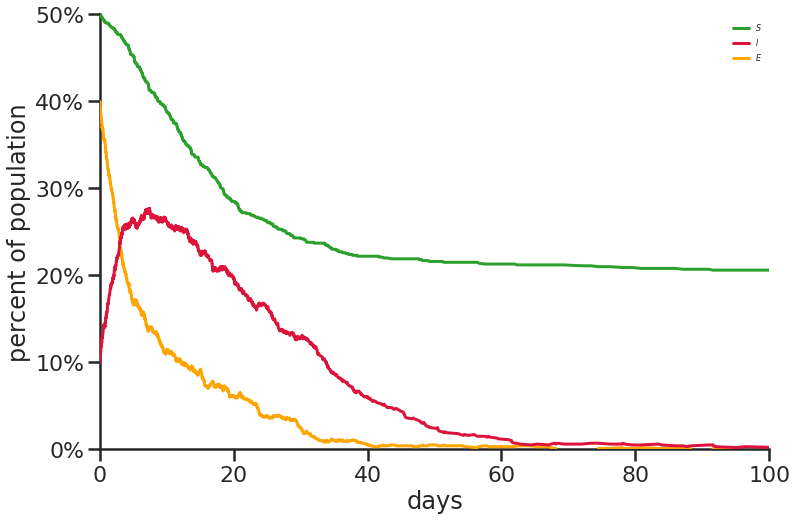

[1000, [[1, 1], [1, 17]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.02
t = 10.01
t = 20.02
t = 30.17
t = 40.11
t = 50.10
t = 60.32
t = 81.00


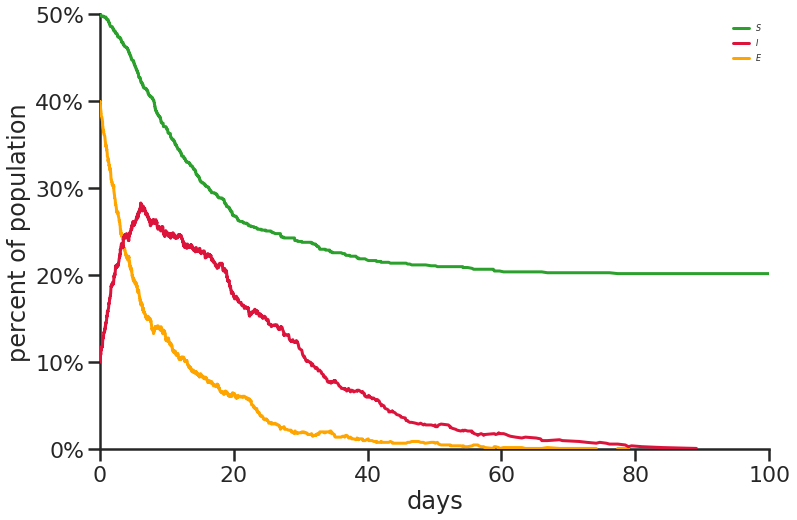

[1000, [[1, 1], [1, 17]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.03
t = 20.13
t = 30.01
t = 40.09
t = 50.97
t = 60.14
t = 70.51
t = 80.13
t = 90.47


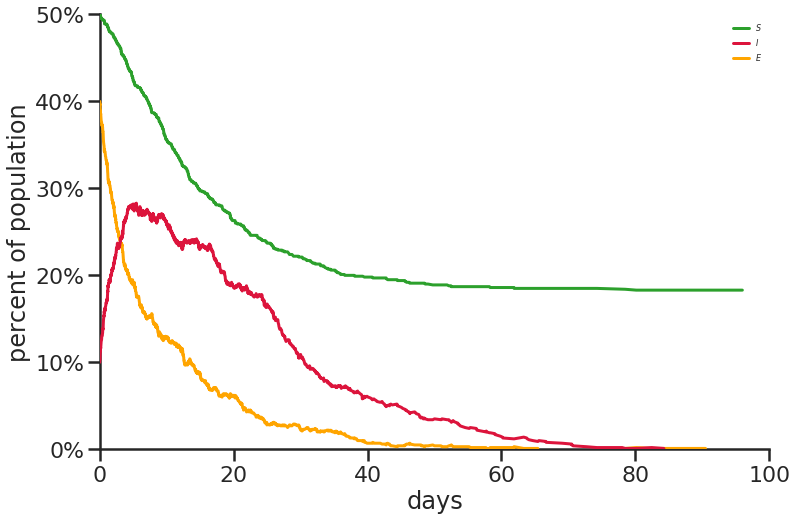

[1000, [[1, 1], [1, 17]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.03
t = 10.04
t = 20.01
t = 30.13
t = 40.02
t = 50.02
t = 60.34
t = 80.45


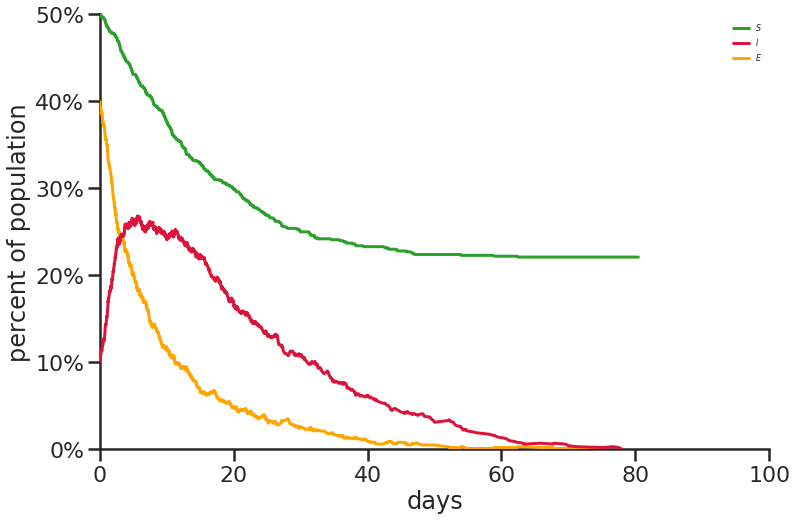

[1000, [[1, 1], [1, 17]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.03
t = 30.09
t = 40.01
t = 50.03
t = 60.11
t = 70.61


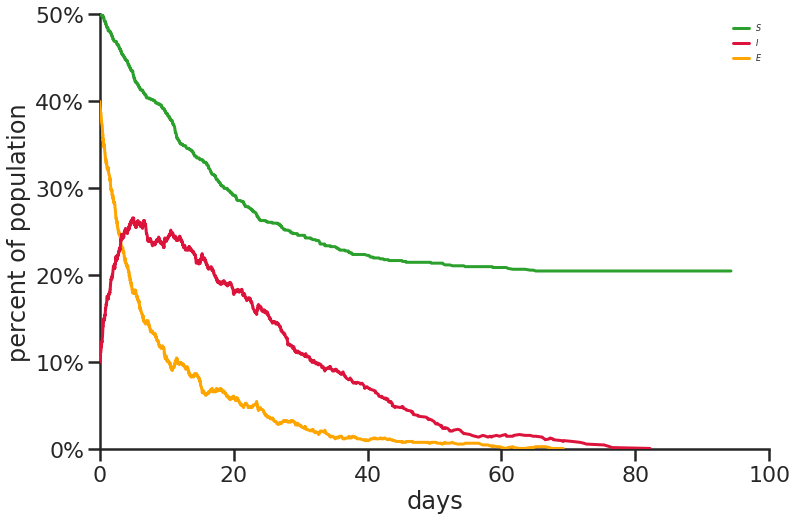

[1000, [[1, 1], [1, 17]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.04
t = 30.00
t = 40.12
t = 50.12
t = 60.36
t = 70.57


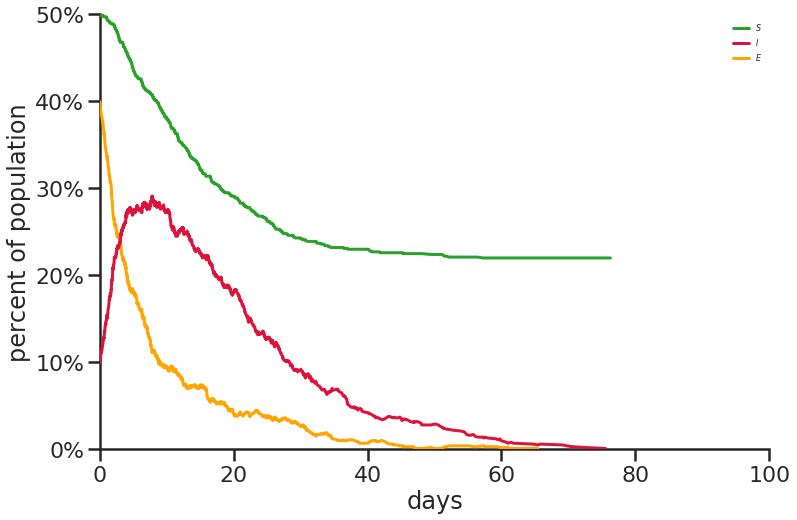

[1000, [[1, 1], [1, 17]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.03
t = 30.11
t = 40.18
t = 50.12
t = 60.81
t = 70.14


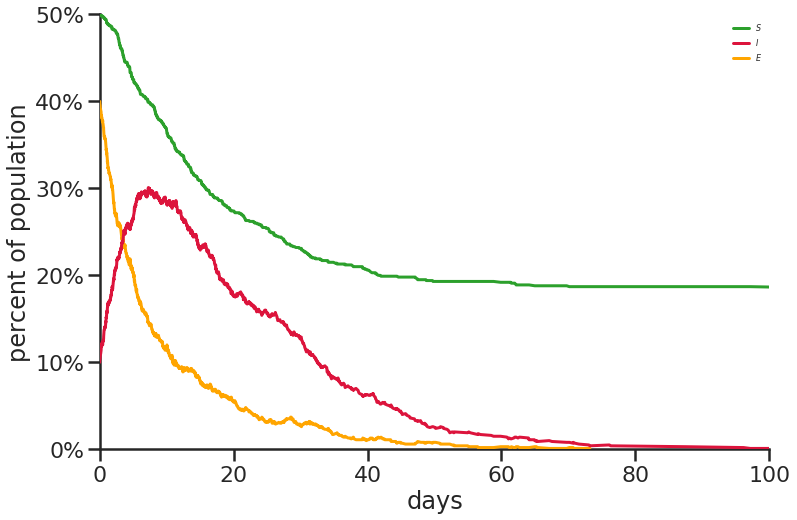

[1000, [[1, 1], [1, 21]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.00
t = 20.04
t = 30.04
t = 40.16
t = 50.01
t = 60.31
t = 70.33


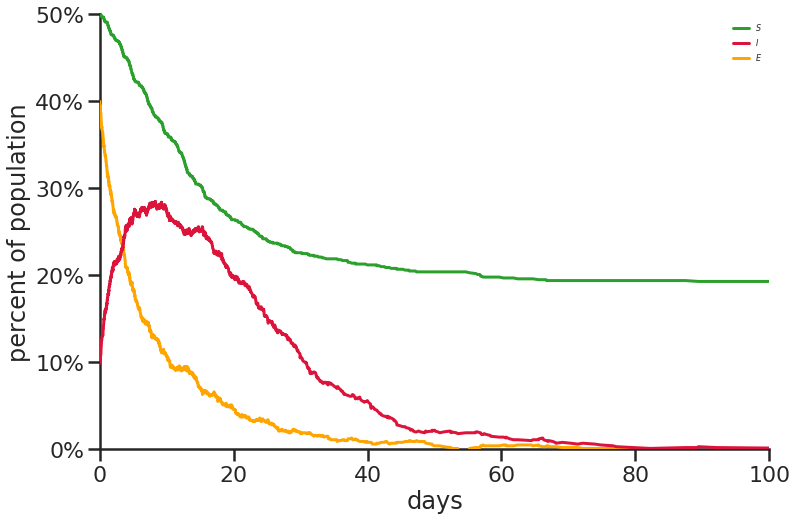

[1000, [[1, 1], [1, 21]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.02
t = 30.01
t = 40.09
t = 50.60
t = 60.83
t = 90.29
t = 100.12


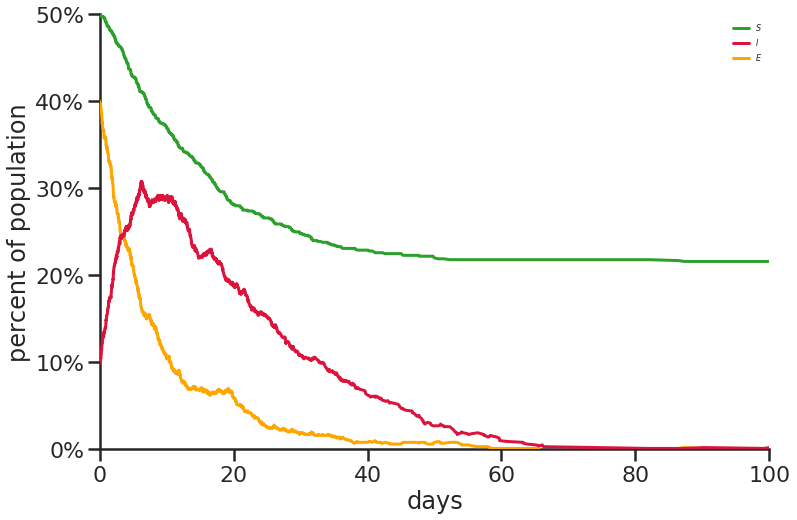

[1000, [[1, 1], [1, 21]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.03
t = 10.01
t = 20.01
t = 30.01
t = 40.03
t = 50.19
t = 60.02
t = 70.55
t = 80.81


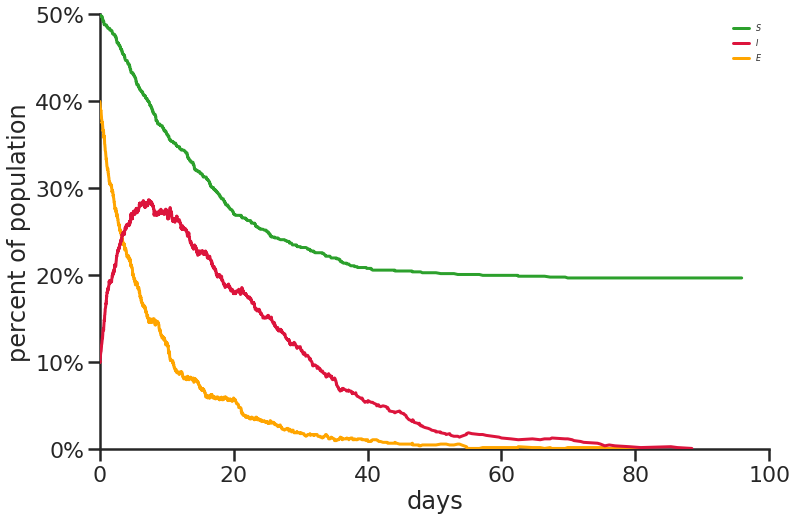

[1000, [[1, 1], [1, 21]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.00
t = 20.14
t = 30.09
t = 40.16
t = 50.09
t = 70.19


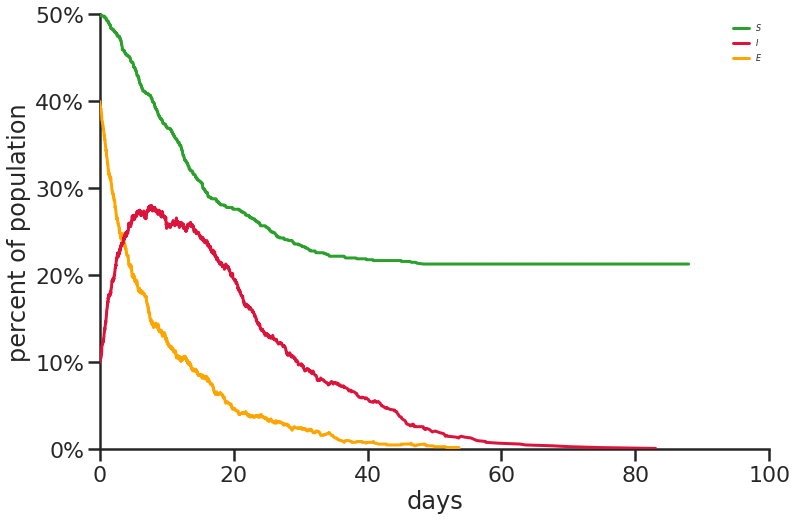

[1000, [[1, 1], [1, 21]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.03
t = 10.00
t = 20.01
t = 30.06
t = 40.00
t = 50.21
t = 60.21


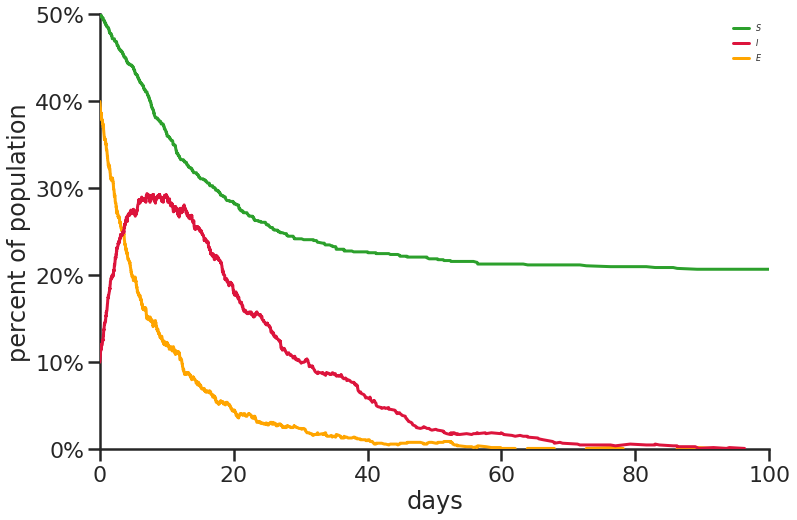

[1000, [[1, 1], [1, 21]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.05
t = 20.04
t = 30.06
t = 40.08
t = 50.86
t = 60.12
t = 70.92
t = 80.88


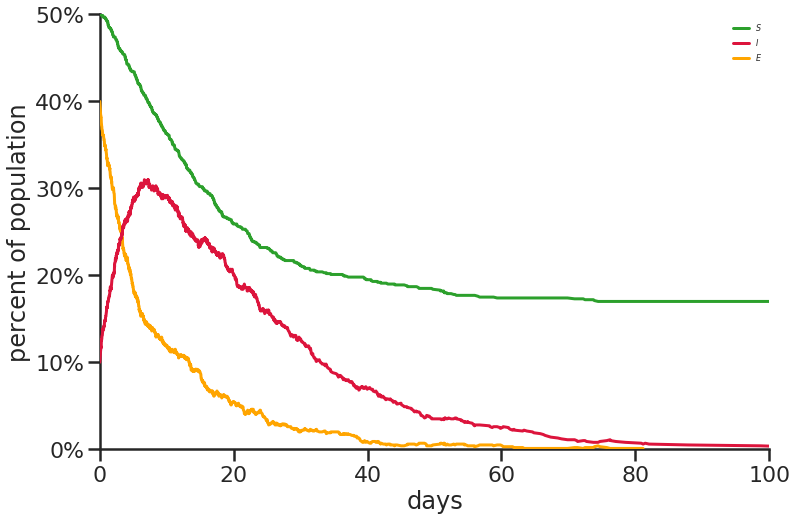

[1000, [[1, 1], [1, 25]], 1, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.01
t = 10.01
t = 20.01
t = 30.06
t = 40.30
t = 50.31
t = 60.02
t = 70.35
t = 100.36


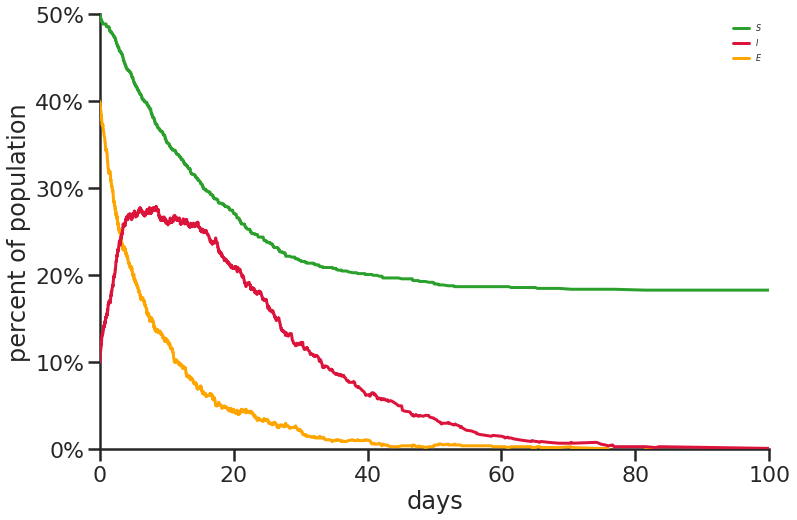

[1000, [[1, 1], [1, 25]], 2, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.01
t = 20.05
t = 30.03
t = 40.05
t = 50.13
t = 60.14


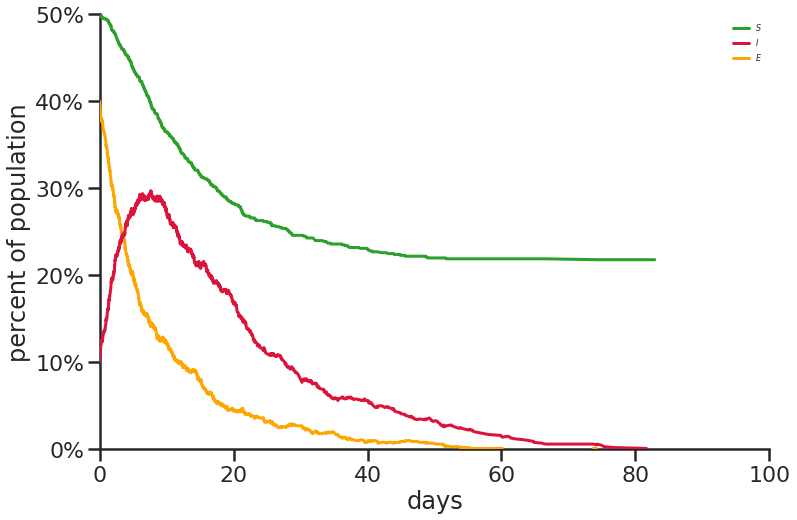

[1000, [[1, 1], [1, 25]], 3, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.02
t = 20.02
t = 30.07
t = 40.11
t = 50.16
t = 80.17


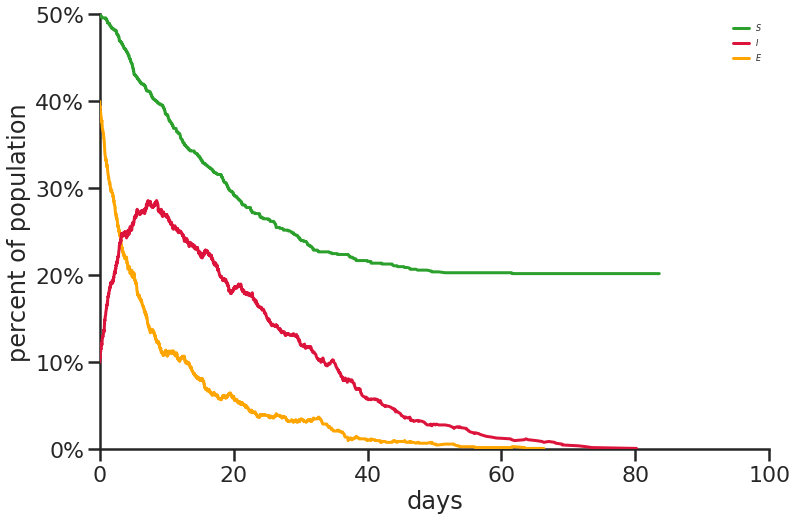

[1000, [[1, 1], [1, 25]], 4, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.02
t = 20.01
t = 30.07
t = 40.01
t = 50.12
t = 60.19
t = 80.61
t = 90.25


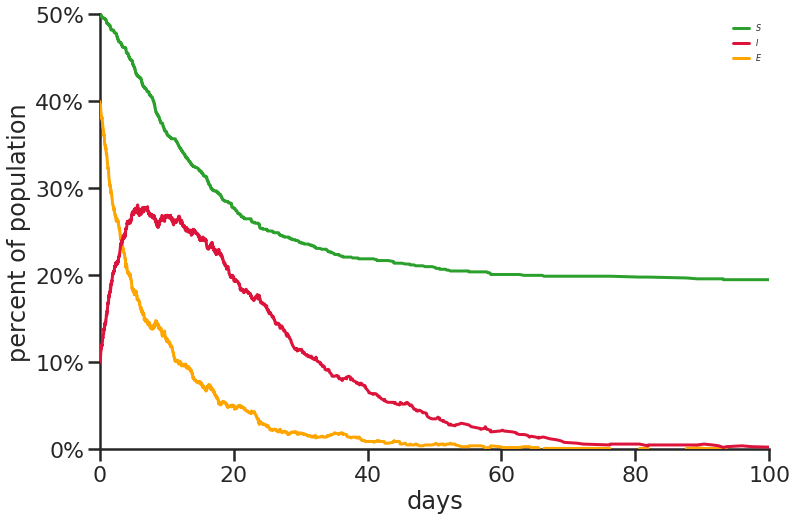

[1000, [[1, 1], [1, 25]], 5, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.00
t = 10.00
t = 20.03
t = 30.04
t = 40.04
t = 50.42
t = 60.24
t = 80.38


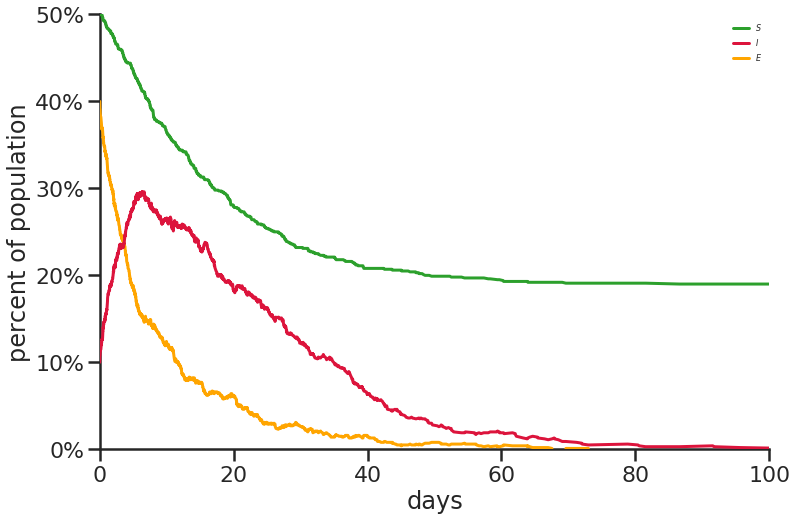

[1000, [[1, 1], [1, 25]], 6, 30]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


t = 0.02
t = 10.01
t = 20.04
t = 30.03
t = 40.11
t = 50.01
t = 60.16
t = 70.51
t = 80.21
t = 90.96
t = 120.75


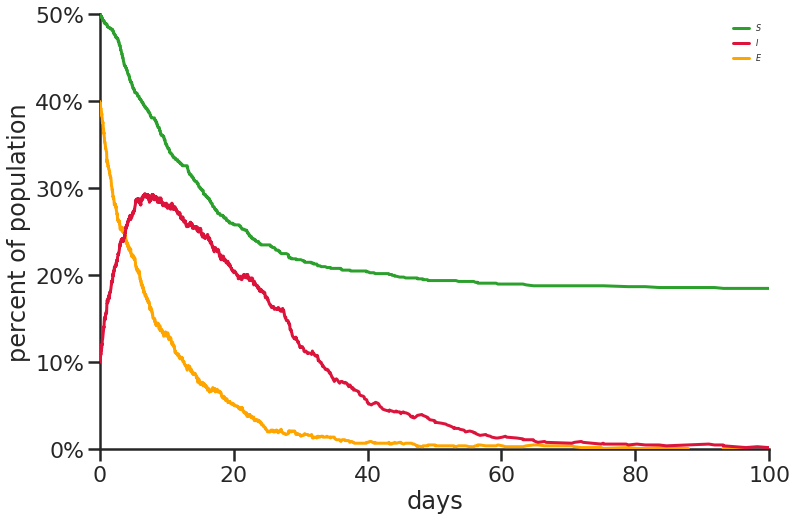

KeyError: '0'

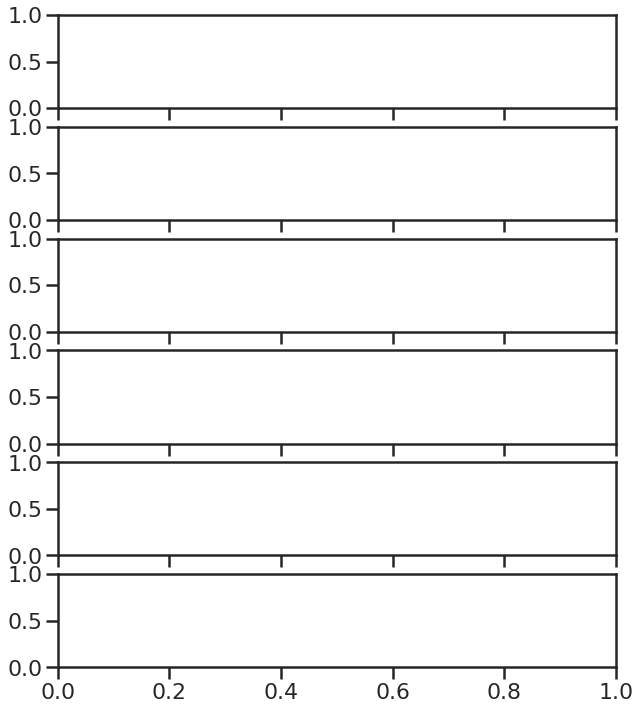

In [54]:
for i in range(5):    
    M =[]
    D =[]
    for l in range(6):
        M_el = []
        D_el = []
        for sdv in range(1, 7):
            peak, days = ipfn(1000,[[1,1],[1,(4*l+5)]], sdv, 30,l)
            M_el.append(peak)
            D_el.append(days)
        M.append(M_el)
        D.append(D_el)
    
    max_val = pd.DataFrame(M, columns=['1','2','3','4','5','6'])
    max_val = max_val.transpose()
    savefigure_t(i)
    

In [ ]:
for i in range (5):
    M=[]
    D=[]
    for l in range(6):
        M_el=[]
        D_el=[]
        for sdv in rnage(1,7):
            peak, days = ipfn(1000)